### Kaggle Dataset – HR Analytics: Job Change of Data Scientists

https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists?select=aug_test.csv

Import relevant libraries

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import OrdinalEncoder 
from scipy import stats

Import and Summarize Dataset

In [3]:
from google.colab import files
files.upload()

Saving aug_train.csv to aug_train.csv


{'aug_train.csv': b'enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target\n8949,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,,,1,36,1.0\n29725,city_40,0.7759999999999999,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0\n11561,city_21,0.624,,No relevent experience,Full time course,Graduate,STEM,5,,,never,83,0.0\n33241,city_115,0.789,,No relevent experience,,Graduate,Business Degree,<1,,Pvt Ltd,never,52,1.0\n666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0\n21651,city_176,0.764,,Has relevent experience,Part time course,Graduate,STEM,11,,,1,24,1.0\n28806,city_160,0.92,Male,Has relevent experience,no_enrollment,High School,,5,50-99,Funded Startup,1,24,0.0\n402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,

In [75]:
df = pd.read_csv('aug_train.csv')

#Check dimensions
print(df.shape)

#Check columns
#print(df.columns)

#Print header
#print(df.head(3))

#Info
#print(df.info)

#Summarize
#print(df.describe())


(19158, 14)


Enrolled in University 

In [76]:
#Categorical variable of enrollment
df['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [77]:
#Assume null values are not enrolled, otherwise they would report as enrolled
df['enrolled_university'].isnull().sum()
df['enrolled_university'].fillna("no_enrollment", inplace = True)

#Setup dummy variables for enrollment
dummies = pd.get_dummies(df['enrolled_university'],prefix='enrolled_university')
df = df.join(dummies)

Education Level

In [78]:
#Ordinal variable of education level
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [79]:
#Cleanup / setup list
df['education_level'] = df['education_level'].str.replace(" ","_", regex=False)
education_level_list = ['Primary_School','High_School','Graduate','Masters','Phd']
numbers = range(1,6)

#Replace null  with Graduate level of education. Basically assumes individuals with significantly differing levels from norm would disclose 
df['education_level'].isnull().sum()
df['education_level'].fillna("Graduate", inplace = True)

#Update column to reflect ordinal numerical values
education_level_list_dictionary = dict(zip(education_level_list, numbers))
df['education_level'].replace(education_level_list_dictionary, inplace=True)

Major discipline

In [80]:
#Categorical variable
df['major_discipline'].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [81]:
#Assume null values are Other, STEM is likely the most important response for this variable
df['major_discipline'].isnull().sum()
df['major_discipline'].fillna("Other", inplace = True)

#Setup dummy variables for major discipline
dummies = pd.get_dummies(df['major_discipline'],prefix='major_discipline')
df = df.join(dummies)

In [82]:
#Setup new combination variable (Enrolled & Education level): Identify highly educated currently enrolled in studies
df.head()

df['High_and_continuing_education'] = (df['enrolled_university'] != 'no_enrollment') & (df['education_level'] > 3 )
df['High_and_continuing_education'] = df['High_and_continuing_education'].astype(int)

In [83]:
#Delete original dataframe columns for education related variables converted to categorical
del df['enrolled_university']
del df['major_discipline']

City variable

In [84]:
#Look at distribution variable categories
df.city.value_counts()

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_121       3
city_129       3
city_111       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64

In [85]:
#Look at unique values
df.city.unique()

array(['city_103', 'city_40', 'city_21', 'city_115', 'city_162',
       'city_176', 'city_160', 'city_46', 'city_61', 'city_114',
       'city_13', 'city_159', 'city_102', 'city_67', 'city_100',
       'city_16', 'city_71', 'city_104', 'city_64', 'city_101', 'city_83',
       'city_105', 'city_73', 'city_75', 'city_41', 'city_11', 'city_93',
       'city_90', 'city_36', 'city_20', 'city_57', 'city_152', 'city_19',
       'city_65', 'city_74', 'city_173', 'city_136', 'city_98', 'city_97',
       'city_50', 'city_138', 'city_82', 'city_157', 'city_89',
       'city_150', 'city_70', 'city_175', 'city_94', 'city_28', 'city_59',
       'city_165', 'city_145', 'city_142', 'city_26', 'city_12',
       'city_37', 'city_43', 'city_116', 'city_23', 'city_99', 'city_149',
       'city_10', 'city_45', 'city_80', 'city_128', 'city_158',
       'city_123', 'city_7', 'city_72', 'city_106', 'city_143', 'city_78',
       'city_109', 'city_24', 'city_134', 'city_48', 'city_144',
       'city_91', 'city_

Possibly, city number could mean something? Let's check.

In [86]:
#Convert city variable to integer
df.city = df.city.str[5:].astype(int)

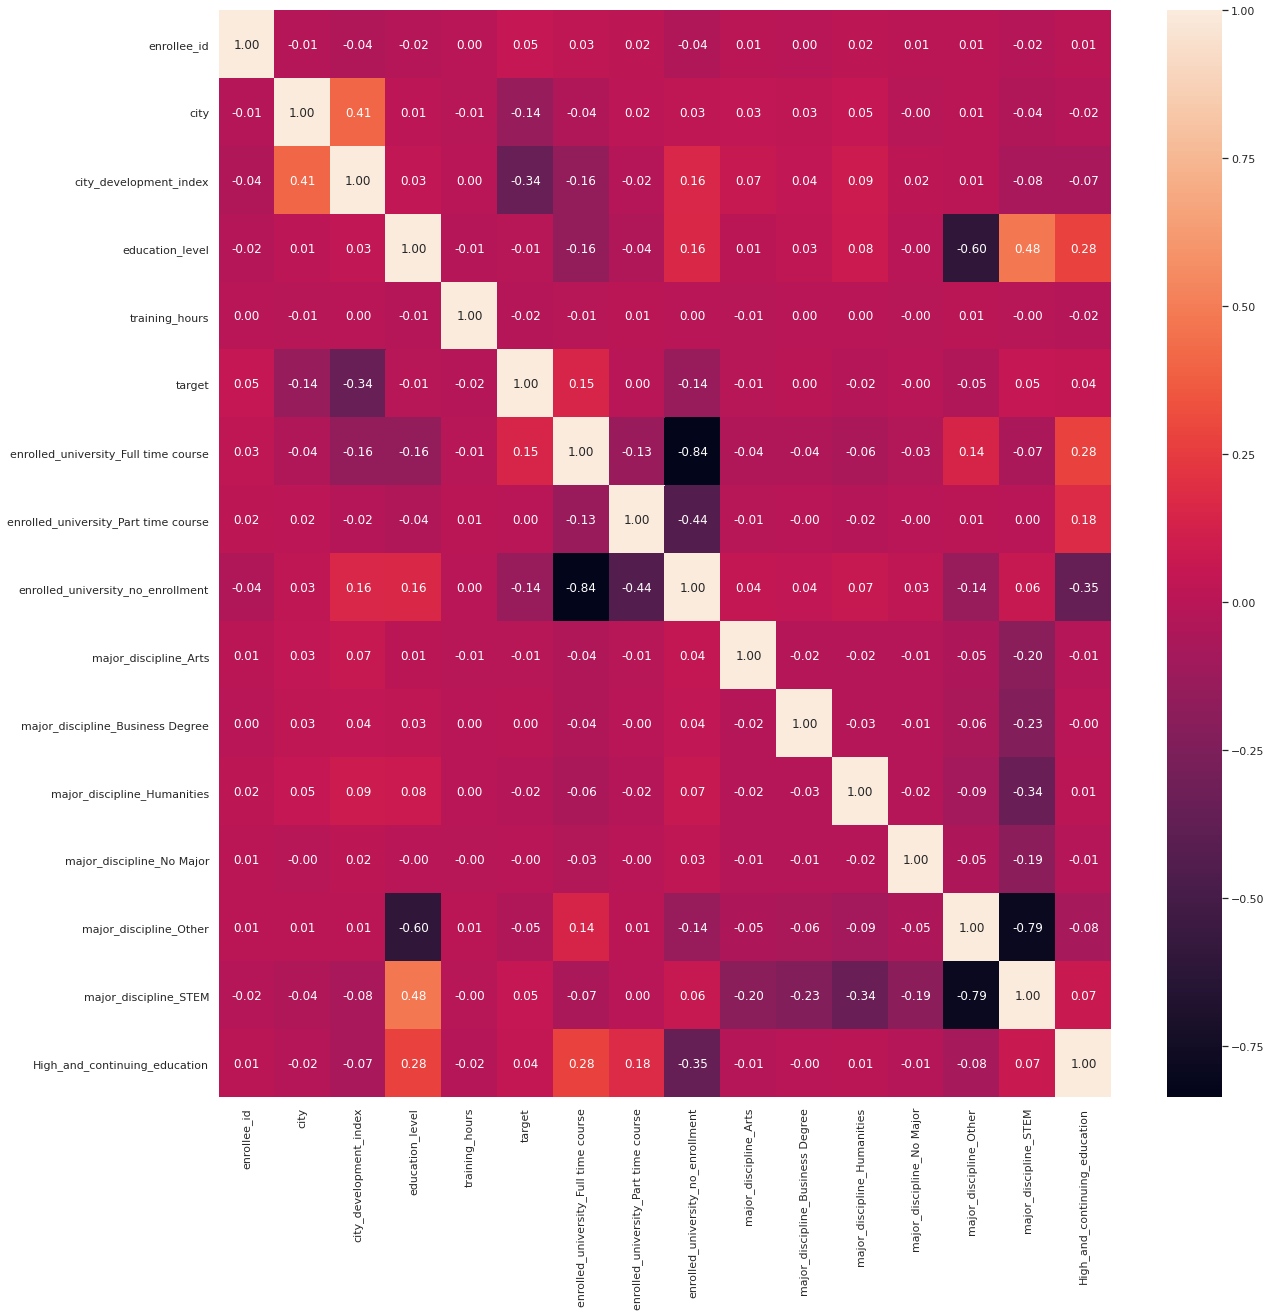

In [87]:
#Look at correlation of city variable with others in the dataset
f,ax = plt.subplots(figsize=(20,20))
corr=df.corr()
sns.heatmap(corr,annot=True,fmt='.2f')

City and City Index show some correlation of 0.41. However, since city number by itself does not signify anything, we can leverage an ordinal encoder.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


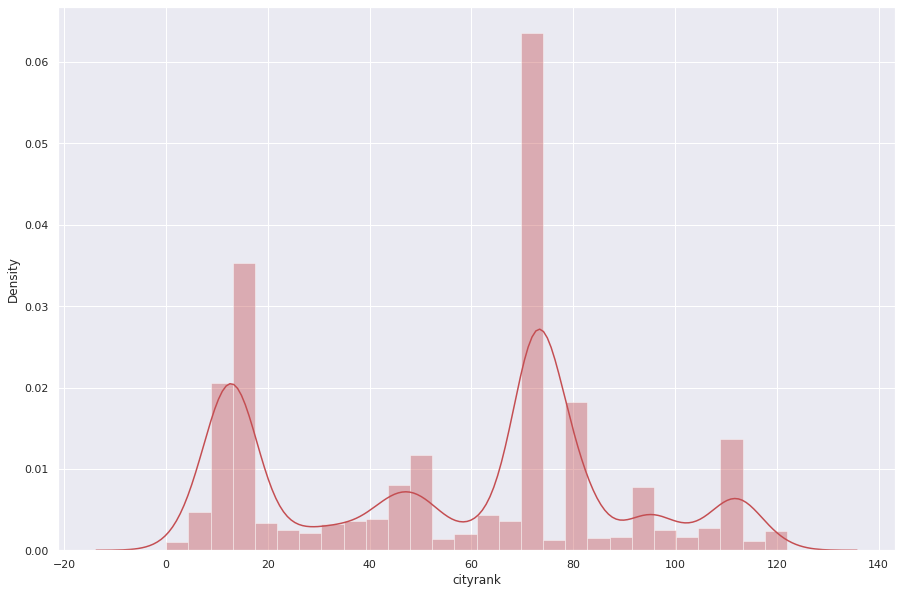

In [88]:
#Transform using ordinal encoder
values = sorted(df['city'].unique())
enc = OrdinalEncoder(categories = [values])

#Plot density function and bar plot
df['cityrank'] = pd.DataFrame(enc.fit_transform(df[['city']]))
plt.figure(figsize=(15,10))
sns.distplot(df['cityrank'], color="r")

In [89]:
df[['city','cityrank']]

city  cityrank
0       103      73.0
1        40      27.0
2        21      14.0
3       115      81.0
4       162     113.0
...     ...       ...
19153   173     118.0
19154   103      73.0
19155   103      73.0
19156    65      44.0
19157    67      45.0

[19158 rows x 2 columns]

The rank ordering looks correct. We can now drop city, as well as enrollee_id which has no correlation with the other variables.

In [90]:
df = df.drop(columns = ['city','enrollee_id'])

Let's look at city development index now

In [91]:
df['city_development_index'].describe()

count    19158.000000
mean         0.828848
std          0.123362
min          0.448000
25%          0.740000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

Index is approximately from .45 to .95, with a mean of 0.83 and SD of 0.12. So, it is a skewed distribution. 
Let's plot it.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


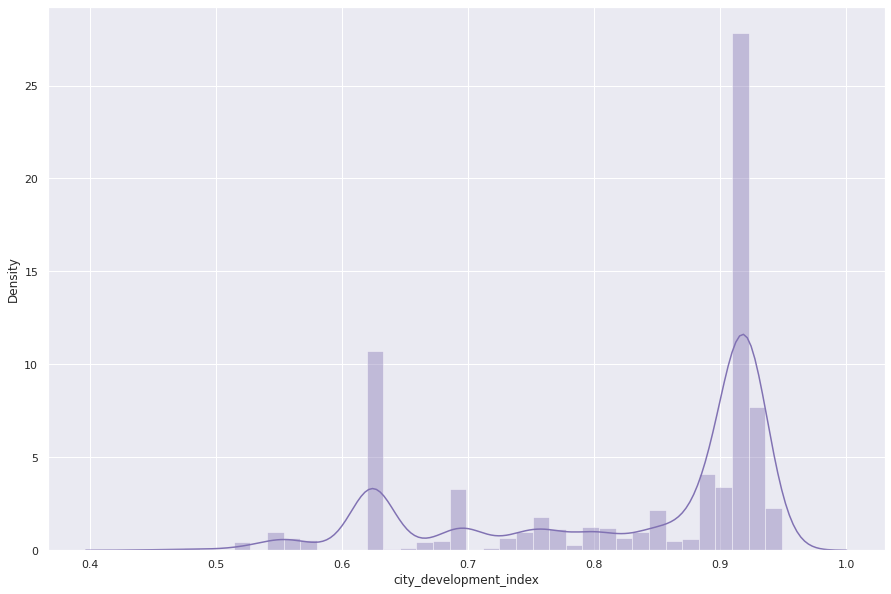

In [92]:
plt.figure(figsize=(15,10))
sns.distplot(df['city_development_index'], color="m")

The strong negative skewness will cause bias in the classification towards majority classes due to outlier effects, so let's try a BoxCox transformation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


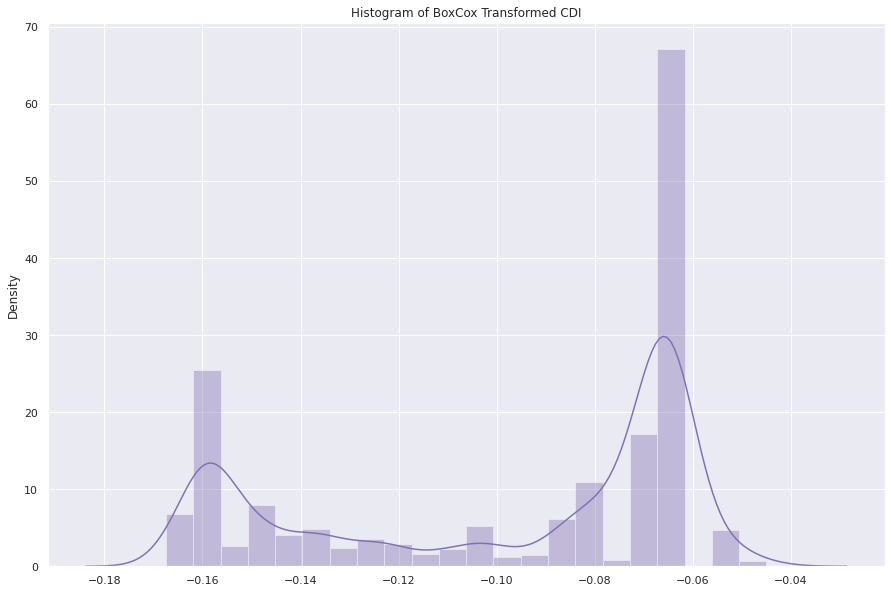

In [93]:
plt.figure(figsize=(15,10))
sns.distplot(stats.boxcox(df['city_development_index'])[0], color="m") 
plt.title('Histogram of BoxCox Transformed CDI')
plt.show()

Now the distribution is somewhat less skewed, so there will not be an outlier issue.

In [94]:
stats.boxcox(df['city_development_index'])[0]

array([-0.06580533, -0.13126178, -0.15853521, ..., -0.06580533,
       -0.12315518, -0.10208846])

In [95]:
df['CDI_transformed'] = stats.boxcox(df['city_development_index'])[0]
df = df.drop(columns = ['city_development_index'])

Let's look at the scatter plot of the two transformed variables for city and city development index:

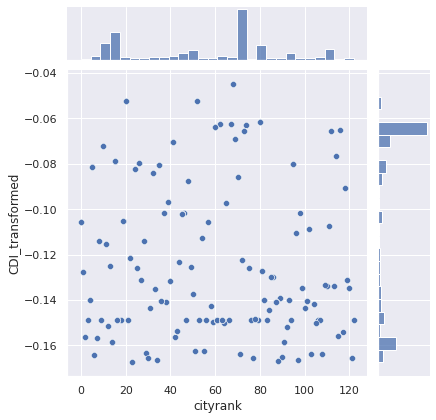

In [96]:
sns.set(rc={'figure.figsize':(20,15)})
sns.jointplot(x='cityrank', y='CDI_transformed', 
              data=df, kind='scatter');

Now let's look at gender

In [97]:
df['gender'].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [98]:
df['gender'].isna().sum()

4508

Let's replace the null values with "Unknown" gender

In [99]:
df['gender'] = df['gender'].fillna("Unknown")
df['gender'].value_counts()

Male       13221
Unknown     4508
Female      1238
Other        191
Name: gender, dtype: int64

Now we need to convert gender into dummy varaibles

In [100]:
dummies = pd.get_dummies(df['gender'], prefix = 'gender')
dummies = dummies.drop(columns = ['gender_Unknown'])
df = df.join(dummies)
df = df.drop(columns = ['gender'])

In [101]:
df.head()

relevent_experience  education_level  ... gender_Male gender_Other
0  Has relevent experience                3  ...           1            0
1   No relevent experience                3  ...           1            0
2   No relevent experience                3  ...           0            0
3   No relevent experience                3  ...           0            0
4  Has relevent experience                4  ...           1            0

[5 rows x 23 columns]

Let's check for outliers now.

In [102]:
z = np.abs(stats.zscore(df['CDI_transformed'], nan_policy = 'omit'))

In [103]:
#Looking for rows > 5 sigma
scores = pd.DataFrame(z)
scores.columns = ['CDI_transformed']
scores.index = df['CDI_transformed'].index
scores[(scores > 5).any(axis=1)]

#No outliers

Empty DataFrame
Columns: [CDI_transformed]
Index: []

Relevant Experience

In [104]:
df['relevent_experience'].unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [105]:
#assigned categorical variables 
a={'Has relevent experience':1,'No relevent experience':0}
df['relevent_experience']=df['relevent_experience'].map(a)

#Dummy columns setup later due to use of column in further analysis

Experience

In [106]:
df['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [107]:
df['experience'].value_counts(normalize = True)

>20    0.172105
5      0.074897
4      0.073482
3      0.070916
6      0.063688
2      0.059027
7      0.053842
10     0.051590
9      0.051328
8      0.042005
15     0.035929
11     0.034777
14     0.030692
1      0.028754
<1     0.027340
16     0.026607
12     0.025873
13     0.020898
17     0.017912
19     0.015922
18     0.014665
20     0.007752
Name: experience, dtype: float64

In [108]:
#Convert to Boolean
df.replace({'experience': '<1'}, '0', inplace=True) 
df.replace({'experience': '>20'}, '20', inplace=True) 

In [109]:
df['experience'].isnull().sum()

65

In [110]:
df['experience'] = df['experience'].astype(float)

In [111]:
#filling in the na with mean
df['experience'].fillna(df.mean(),inplace=True)

#Drop rows that left (65)
df = df[df['experience'].notna()]

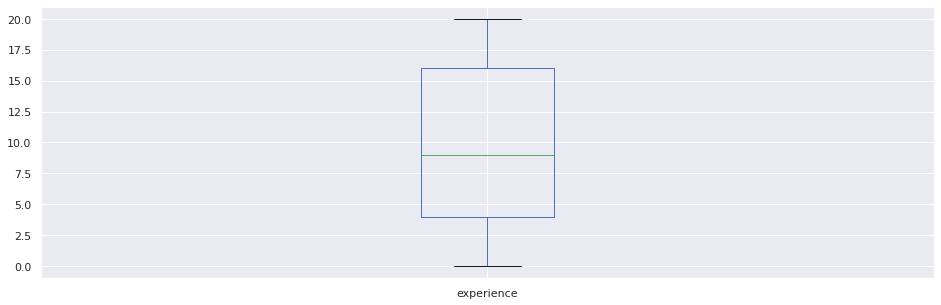

In [112]:
#Check for outlier - none
df['experience'].plot.box(figsize=(16,5))
plt.show()

New feature based on Relevant Experience and Overall Experience. Identify highly experienced professionals with low relevant experience

In [113]:
df['experience'].median()

9.0

In [114]:
#Function to assign categorie,we determined experience level greater than experience median 9 years are considered highly experienced professionals. 
def myfunc(relevent_experience, experience):
    if relevent_experience==1 and experience>=9:
        myvalue=1
    elif relevent_experience==1 and experience<9:
        myvalue=2
    elif relevent_experience==0 and experience>=9:
        myvalue=3
    else:
        myvalue=4
    return myvalue

In [115]:
#Apply function
df['experience_contrast'] = df.apply(lambda x: myfunc(x['relevent_experience'], x['experience']), axis=1)

In [116]:
#Setup dummy columns for new categorical feature
dummies = pd.get_dummies(df['experience_contrast'],prefix='experience_contrast')
df = df.join(dummies)
del df['experience_contrast']
df.head()

relevent_experience  ...  experience_contrast_4
0                    1  ...                      0
1                    0  ...                      0
2                    0  ...                      1
3                    0  ...                      1
4                    1  ...                      0

[5 rows x 27 columns]

In [117]:
#Setup dummy columns for relevant_experience
dummies = pd.get_dummies(df['relevent_experience'], prefix = 'relevent_experience')
df = df.join(dummies)
df = df.drop(columns = ['relevent_experience'])

Last New Job

In [118]:
#List of values
df['last_new_job'].unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [119]:
#Check null values
df['last_new_job'].isnull().sum()

399

In [120]:
#Replacement of values at extremes
df.replace({'last_new_job': 'never'}, '0', inplace=True)
df.replace({'last_new_job': '>4'}, '5', inplace=True)

#Set value as float
df['last_new_job'] = df['last_new_job'].astype(float)

#Fill missing values with mean
df['last_new_job'].fillna(df['last_new_job'].mean(),inplace=True)

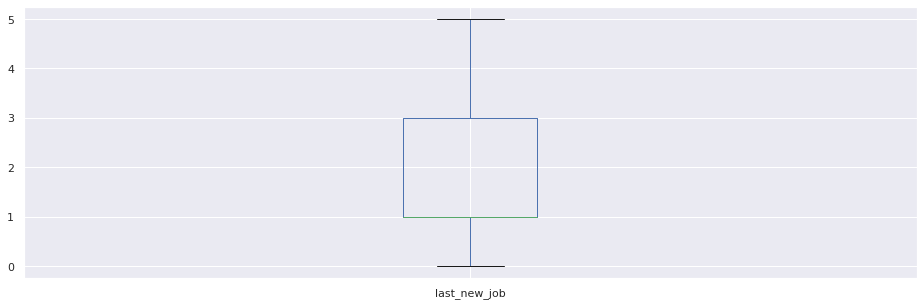

In [121]:
#Check for outlier - none
df['last_new_job'].plot.box(figsize=(16,5))
plt.show()

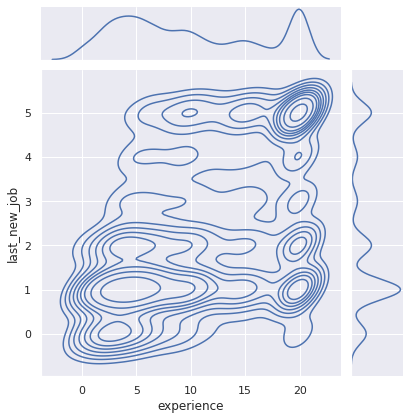

In [122]:
#Since experience is correlated to last new job:
sns.set(rc={'figure.figsize':(20,15)})
sns.jointplot(x='experience', y='last_new_job', 
              data=df, kind='kde');

Higher "last_new_job" means higher experience. So we can split up the >20 into different levels based on last new job.

In [123]:
df[df.experience != 20].groupby("last_new_job").experience.mean()

last_new_job
0.000000     4.848681
1.000000     7.056701
2.000000     8.312629
2.001123     4.978082
3.000000     9.319662
4.000000    10.084788
5.000000    12.159104
Name: experience, dtype: float64

In [124]:
df[df.experience == 20].groupby("last_new_job").experience.count()

last_new_job
0.000000     131
1.000000     841
2.000000     466
2.001123      34
3.000000     194
4.000000     226
5.000000    1542
Name: experience, dtype: int64

In [125]:
#Assuming >20, implies 3 levels of 21,  25 and 30:
df.loc[(df['last_new_job'] <3) & (df['experience'] == 20), 'experience'] = 21
df.loc[(df['last_new_job'] <5) & (df['last_new_job'] >= 3) & (df['experience'] == 20), 'experience'] = 25
df.loc[(df['last_new_job'] ==5) & (df['experience'] == 20), 'experience'] = 30

In [126]:
df[df.experience >20].groupby("last_new_job").experience.mean()

last_new_job
0.000000    21.0
1.000000    21.0
2.000000    21.0
2.001123    21.0
3.000000    25.0
4.000000    25.0
5.000000    30.0
Name: experience, dtype: float64

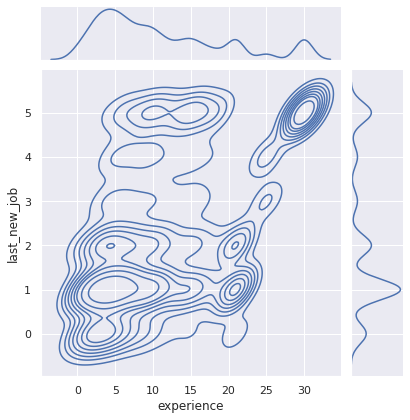

In [127]:
#Let's recheck the pairwise density plot:
sns.set(rc={'figure.figsize':(20,15)})
sns.jointplot(x='experience', y='last_new_job', 
              data=df, kind='kde');

Training hours

In [128]:
# training hours
df["training_hours"].describe()
# The standard deviation being almost as high as the mean may indicate positive skew, as training hours cannot be negative. The quartiles also show greater variance to the right, which may suggest a transformation.

count    19093.000000
mean        65.345257
std         60.051868
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64

In [129]:
sum(df["training_hours"].isna())

0

In [130]:
 training_z = np.abs(stats.zscore(df.training_hours, nan_policy = 'omit'))
 len(df.training_hours[training_z>5])

 #There are no NAs or extreme outliers to remove.

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


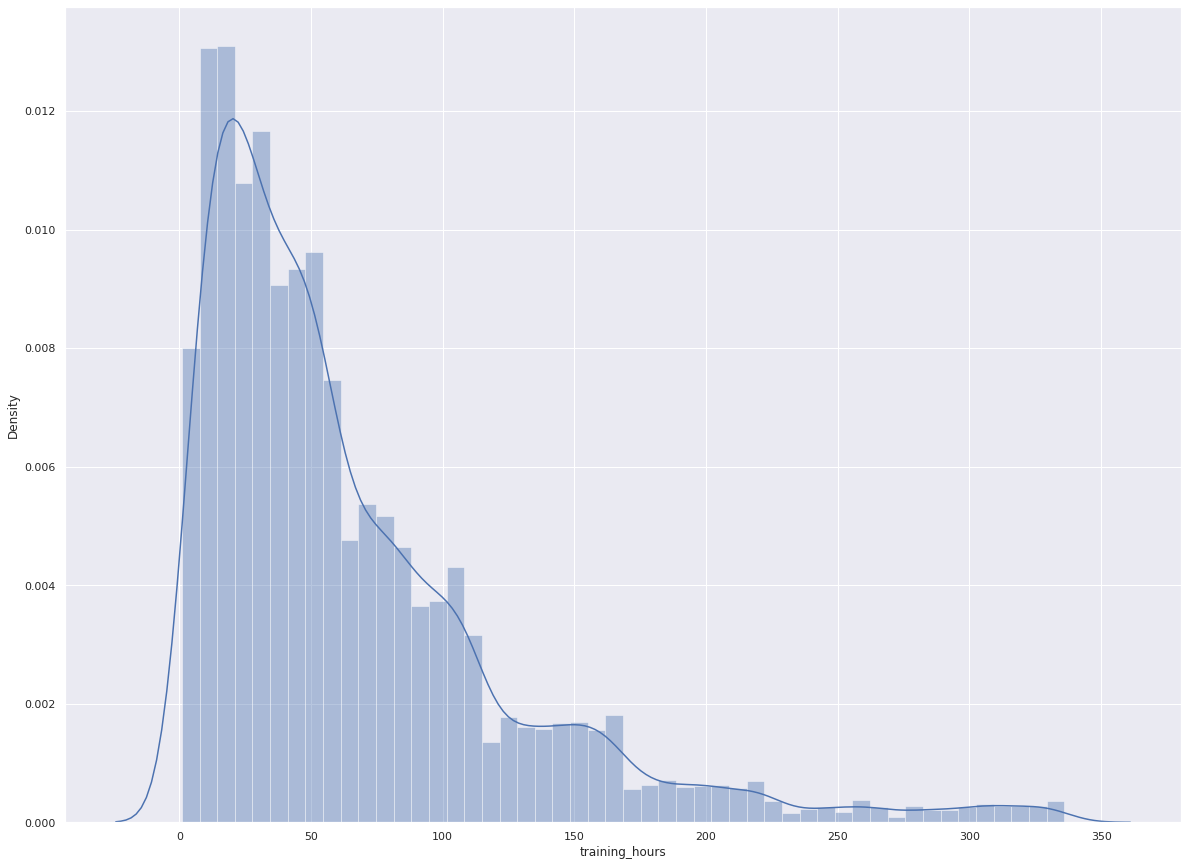

In [131]:
sns.distplot(df.training_hours)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


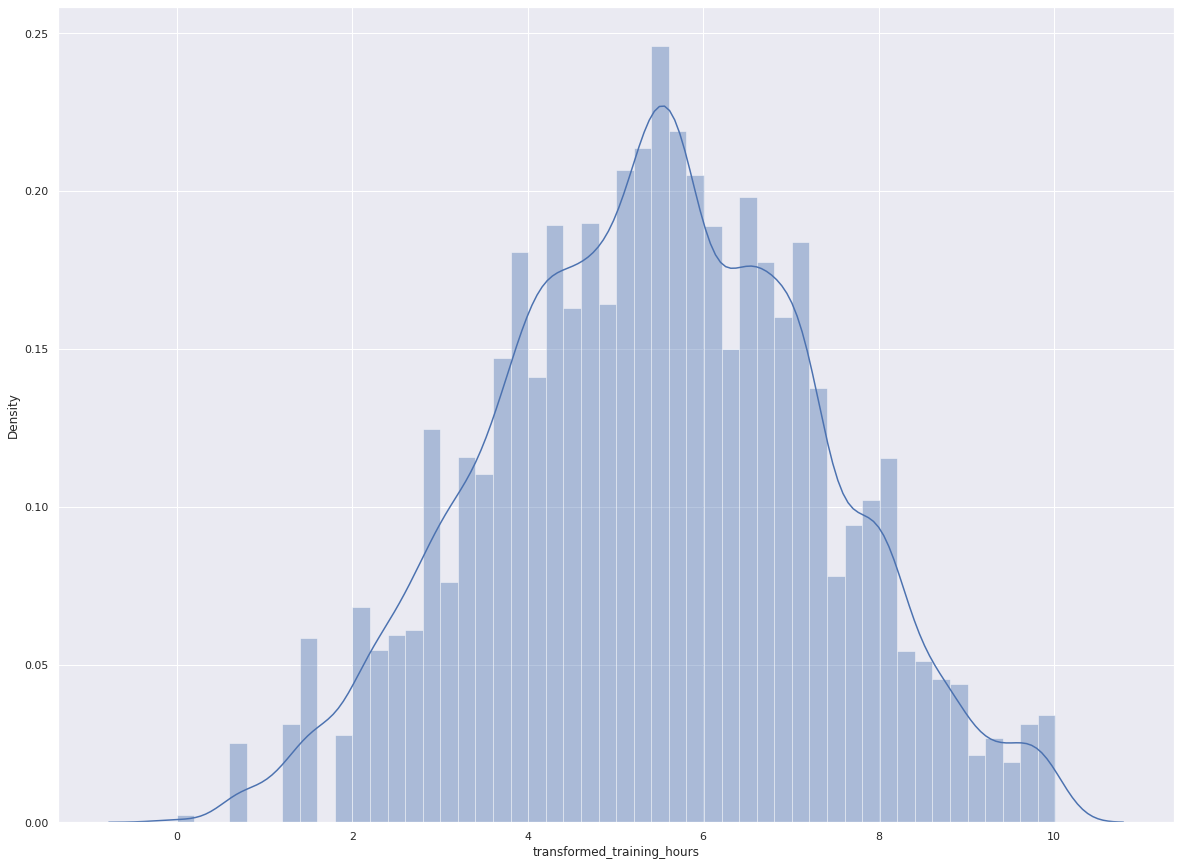

In [132]:
df["transformed_training_hours"] = stats.boxcox(df['training_hours'])[0]
sns.distplot(df.transformed_training_hours)
# The data has fewer outliers.

In [133]:
# Delete training hours and use transformed_training_hourse
del df["training_hours"]

Company size and company type

In [134]:
sum(df["company_size"].isna())

5915

In [135]:
sum(df["company_type"].isna())

6104

Both company size and type have a significant number of missing values. 

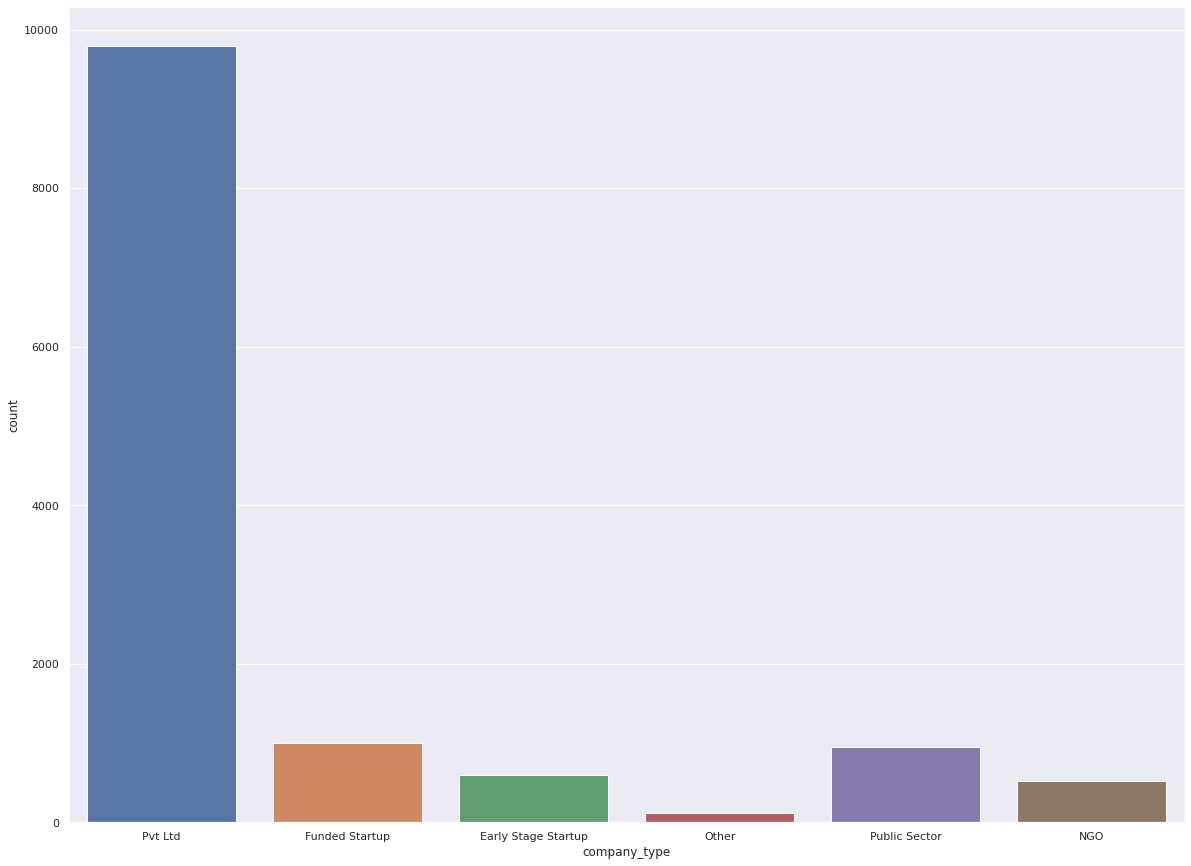

In [136]:
sns.countplot(x=df["company_type"])

In [137]:
df["company_type"].value_counts()

Pvt Ltd                9796
Funded Startup          999
Public Sector           953
Early Stage Startup     601
NGO                     519
Other                   121
Name: company_type, dtype: int64

The vast majority of company_type are Pvt Ltd. Given how common this type is, NA values are filled with Pvt Ltd. 

In [138]:
df["company_type"] = df["company_type"].fillna("Pvt Ltd")

In [139]:
size_numeric_map = {"50-99":75,
                   "100-500":300,
                    "500-999":750,
                   "10000+":12000,
                   "10/49":35,
                   "1000-4999":3000,
                   "5000-9999":7500,
                   "<10":5}
df["company_size"]= df["company_size"].replace(size_numeric_map)

In [140]:
df["company_size"].value_counts()

75.0       3078
300.0      2563
12000.0    2011
35.0       1466
3000.0     1323
5.0        1304
750.0       874
7500.0      559
Name: company_size, dtype: int64

In [141]:
size_keys = df.groupby("company_type").company_size.mean()
size_keys 

company_type
Early Stage Startup      42.399666
Funded Startup          142.203219
NGO                    1962.302231
Other                  2704.336283
Public Sector          3621.881068
Pvt Ltd                2912.804254
Name: company_size, dtype: float64

In [142]:
predicted_keys = [size_keys[key] for key in df["company_type"]]
df["company_size"] = np.where(df["company_size"].isna(),predicted_keys,df["company_size"])
df["company_size"].value_counts()

2912.804254     5744
75.000000       3078
300.000000      2563
12000.000000    2011
35.000000       1466
3000.000000     1323
5.000000        1304
750.000000       874
7500.000000      559
3621.881068      129
1962.302231       26
2704.336283        8
142.203219         5
42.399666          3
Name: company_size, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


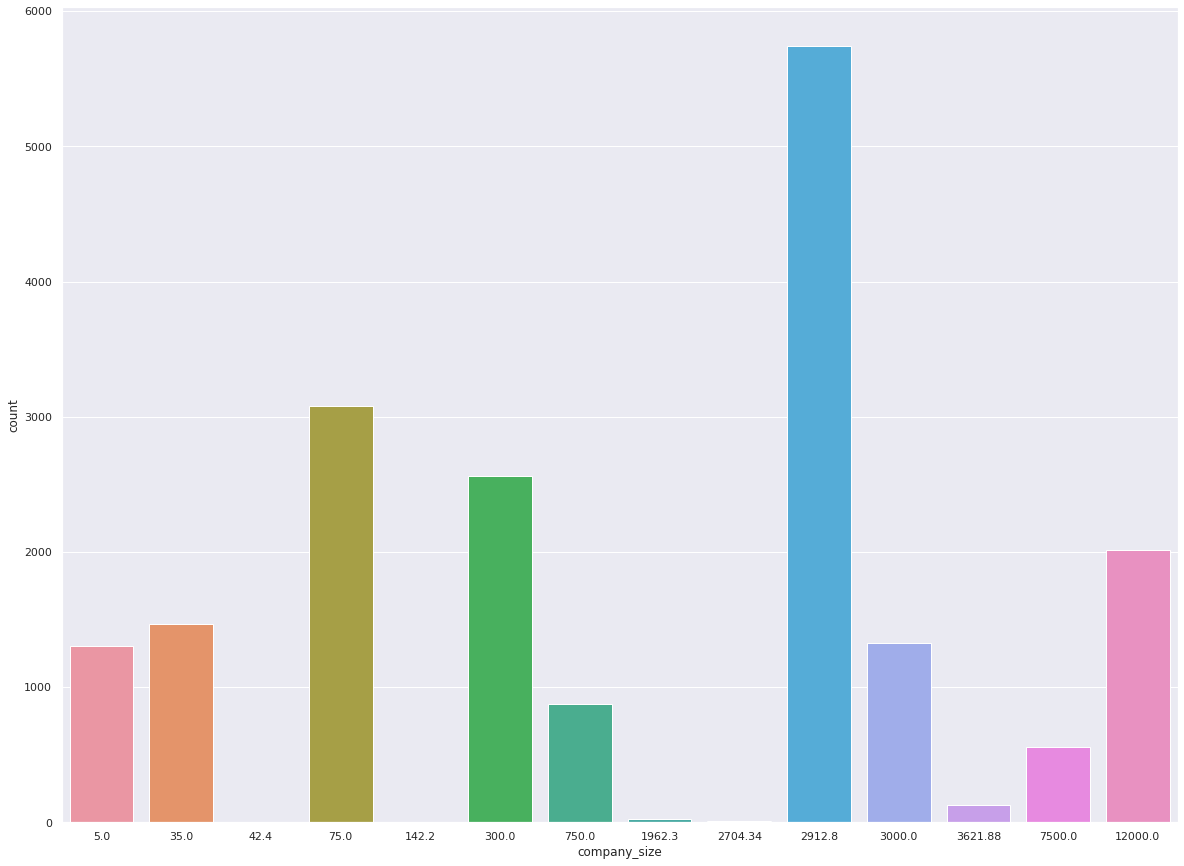

In [143]:
sns.countplot(np.round(df["company_size"],2)) 

In [ ]:
#Setup dummy columns for company type
dummies = pd.get_dummies(df['company_type'], prefix = 'company_type',drop_first=True)
df = df.join(dummies)
df = df.drop(columns = ['company_type'])

In [ ]:
#Delete dummy variables that are correlated within their set
df.drop(columns = ['enrolled_university_Part time course', 'major_discipline_No Major' , 'experience_contrast_3', 'relevent_experience_0'], inplace = True)

In [ ]:
# Check null values for full dataframe
df.isnull().sum()

education_level                         0
experience                              0
company_size                            0
last_new_job                            0
target                                  0
enrolled_university_Full time course    0
enrolled_university_no_enrollment       0
major_discipline_Arts                   0
major_discipline_Business Degree        0
major_discipline_Humanities             0
major_discipline_Other                  0
major_discipline_STEM                   0
High_and_continuing_education           0
cityrank                                0
CDI_transformed                         0
gender_Female                           0
gender_Male                             0
gender_Other                            0
experience_contrast_1                   0
experience_contrast_2                   0
experience_contrast_4                   0
relevent_experience_1                   0
transformed_training_hours              0
company_type_Funded Startup       

Initial variable correlations / selection

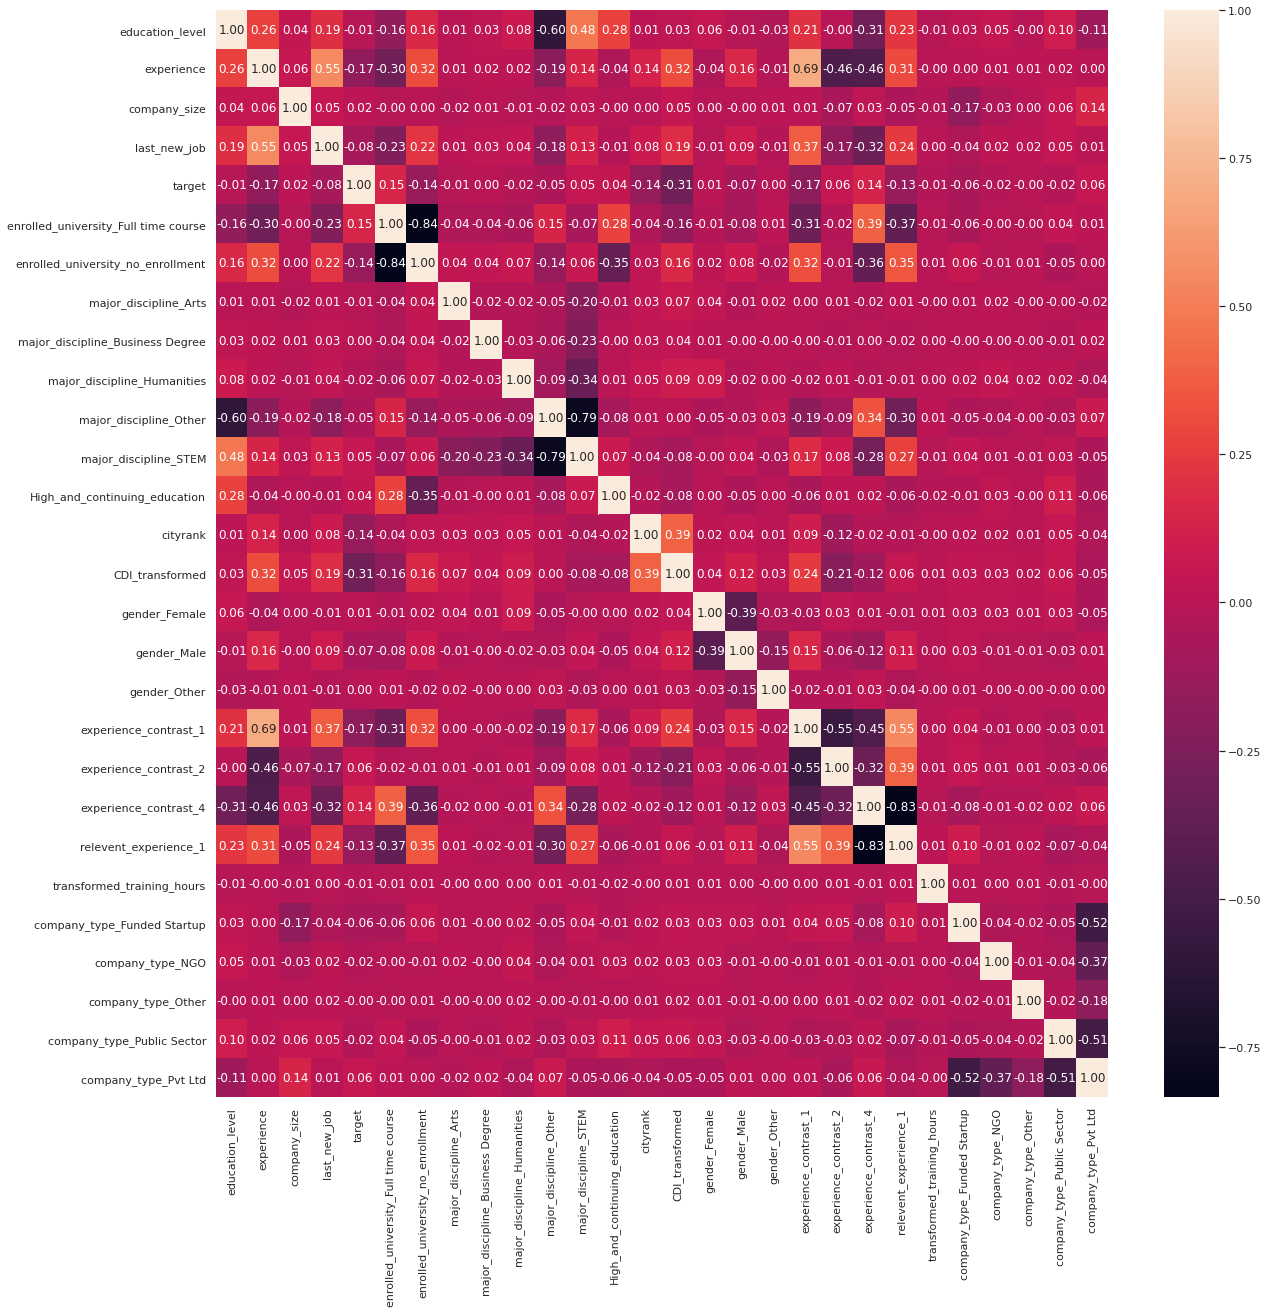

In [ ]:
#Look at correlations across the variables
f,ax = plt.subplots(figsize=(20,20))
corr=df.corr()
sns.heatmap(corr,annot=True,fmt='.2f')

In [ ]:
# Check correlation of target with other variables
correlations_list = df.corr()['target'][:]
abs_correlations_list_sorted = correlations_list.abs().sort_values(ascending=False)
abs_correlations_list_sorted

target                                  1.000000
CDI_transformed                         0.310024
experience_contrast_1                   0.171201
experience                              0.166062
enrolled_university_Full time course    0.149740
cityrank                                0.142726
experience_contrast_4                   0.137214
enrolled_university_no_enrollment       0.136809
relevent_experience_1                   0.128987
last_new_job                            0.082129
gender_Male                             0.073691
experience_contrast_2                   0.059794
company_type_Funded Startup             0.059147
company_type_Pvt Ltd                    0.058105
major_discipline_STEM                   0.050489
major_discipline_Other                  0.047521
High_and_continuing_education           0.044721
company_type_NGO                        0.024748
major_discipline_Humanities             0.017353
company_size                            0.016286
company_type_Public 

# Clustering

In [ ]:
df2 = df.drop(['target'], axis = 1)
df2.shape

(19093, 27)

##### 1. t-SNE

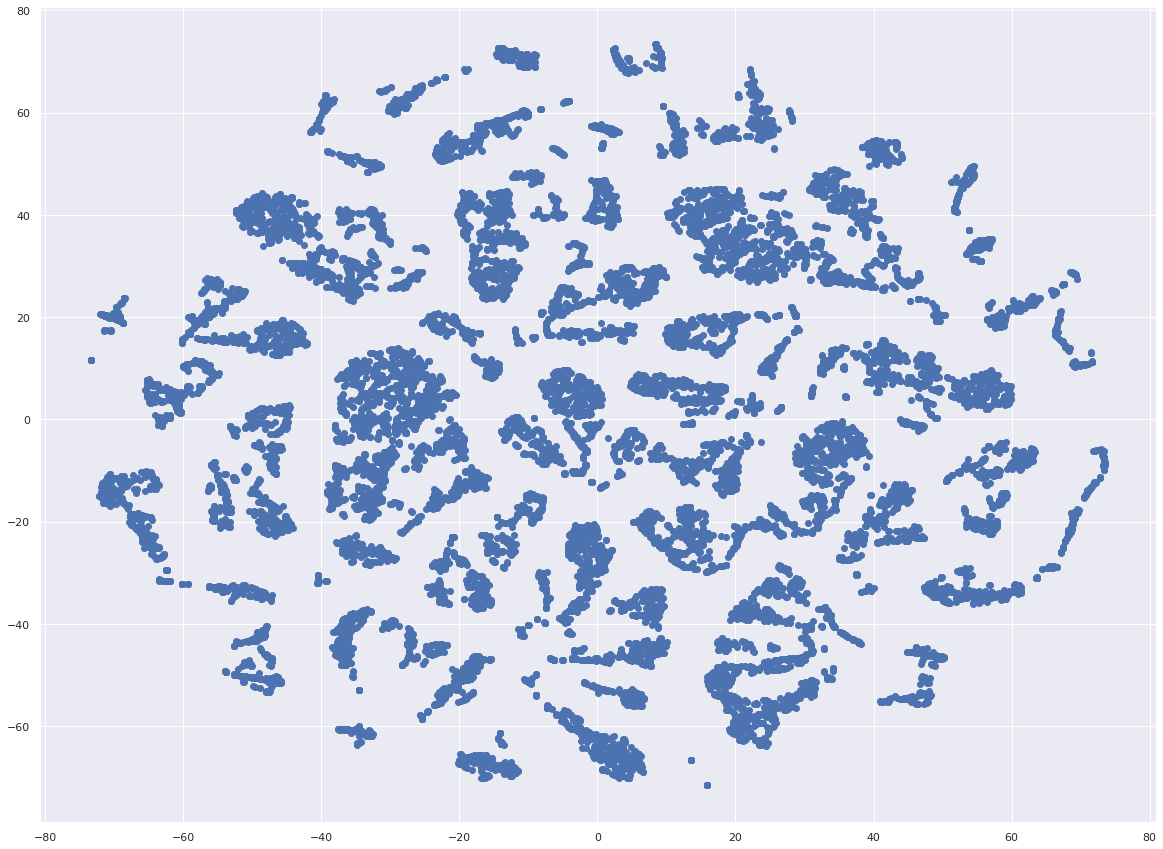

In [ ]:
from sklearn.manifold import TSNE
model=TSNE(learning_rate=100)
Tsne_transformed=model.fit_transform(df2)
xs =Tsne_transformed[:,0]
ys=Tsne_transformed[:,1]
plt.scatter(xs,ys)
plt.show()

t-SNE shows multiple small clusters, too many to easily model separately.

#### 2. k-means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
df3 = pd.DataFrame(scaler.fit_transform(df2), columns = df2.columns)
df3.shape

(19093, 27)

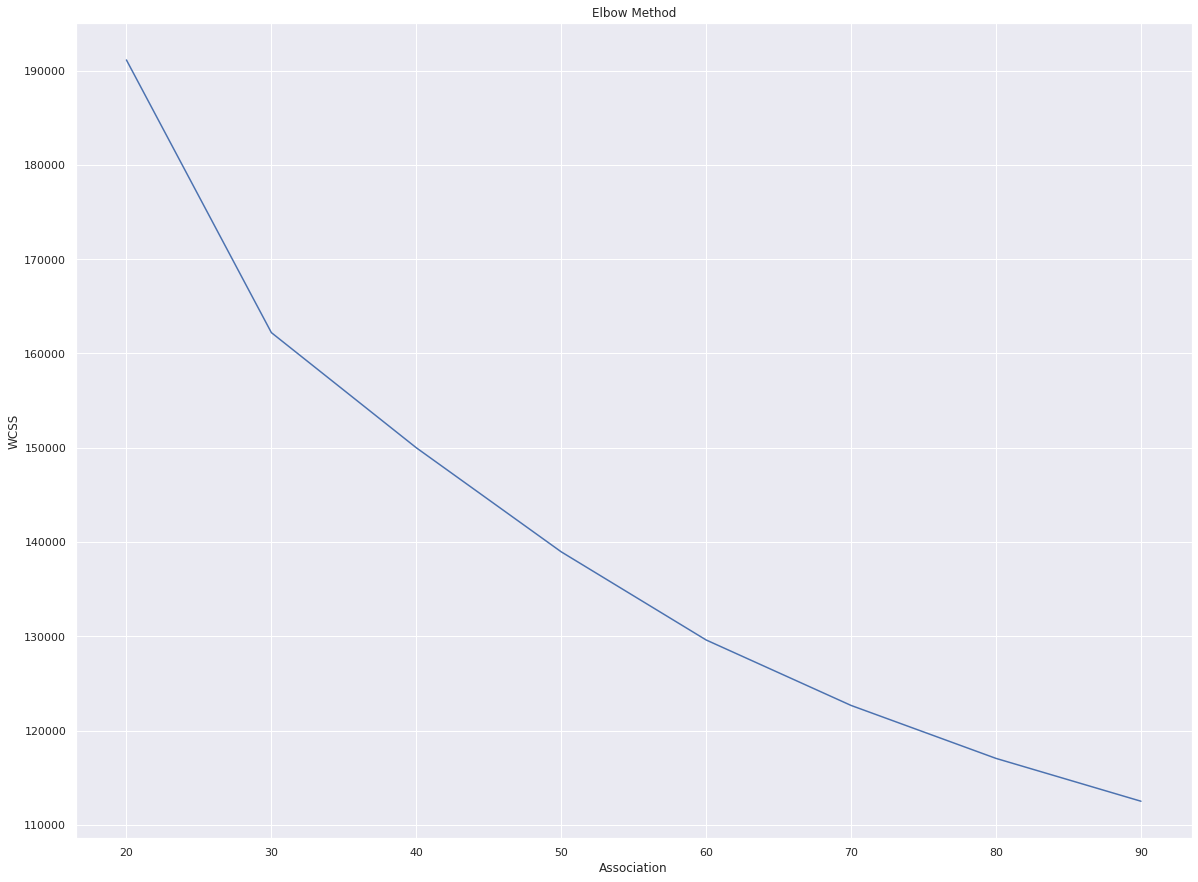

In [ ]:
wcss = []
for i in range(20, 100, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(df3)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(20, 100, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Association')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

Using the Elbow Method, let's pick 70 clusters

In [ ]:
kmeans = KMeans(n_clusters =  70, init = 'k-means++', max_iter = 500, 
                n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df3)
df2_cluster = df2.copy(deep=True) 
df2_cluster['cluster'] = y_kmeans
df2_cluster

education_level  experience  ...  company_type_Pvt Ltd  cluster
0                    3        21.0  ...                     1       13
1                    3        15.0  ...                     1       66
2                    3         5.0  ...                     1       60
3                    3         0.0  ...                     1       38
4                    4        25.0  ...                     0        5
...                ...         ...  ...                   ...      ...
19153                3        14.0  ...                     1       40
19154                3        14.0  ...                     1       39
19155                3        25.0  ...                     1       25
19156                2         0.0  ...                     1       29
19157                1         2.0  ...                     1       55

[19093 rows x 28 columns]

Let's do some PCA feature reduction to be able to visualize the 70 clusters by most important features

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
def plot_scaled_variance(pca):
    fig, ax = plt.subplots(figsize=(20,10))
    ax.set_xlabel('Dimension #')
    ax.set_ylabel('Cumulative Explained Variance Ratio')
    ax.set_title('Cumulative Fraction of Explained Variance')
    ax.plot(np.cumsum(pca.explained_variance_ratio_))
    return ax

In [ ]:
pca = PCA(n_components = 27) #change compoents from 31 to 27 as 31 was out of bounds 0~27
pca.fit(df3)

PCA(copy=True, iterated_power='auto', n_components=27, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

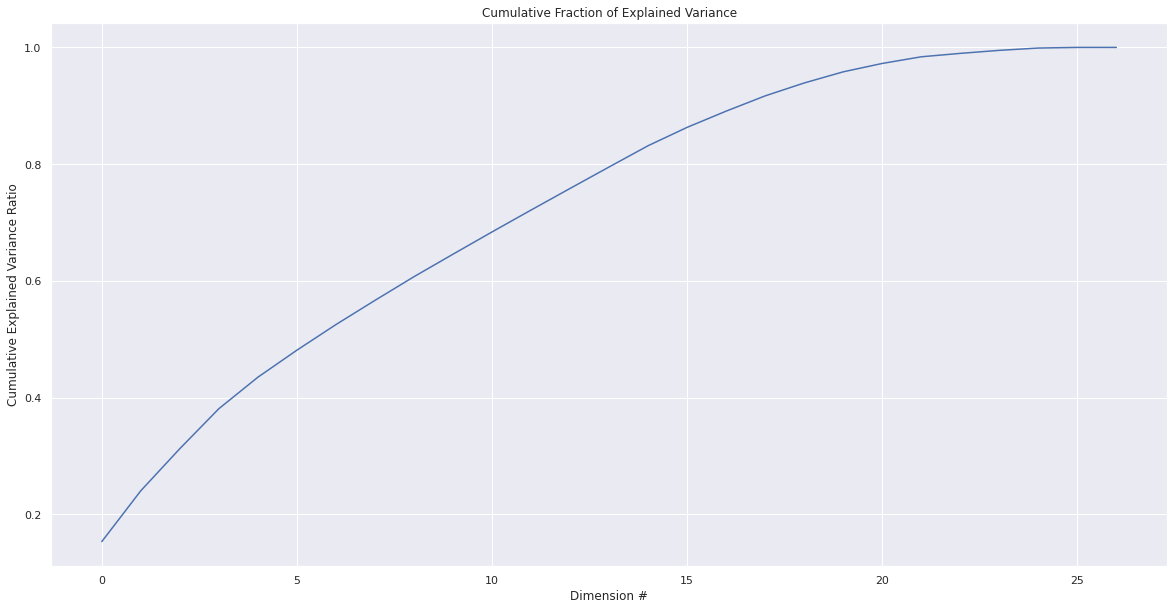

In [ ]:
ax = plot_scaled_variance(pca)
ax.grid(True)

First 20 dimensions explain more than 90% of variance

In [ ]:
pca2 = PCA(n_components = 20)
pca2.fit(df3)
reduced = pca2.transform(df3)
reduced.shape

(19093, 20)

Let's plot the first 3 dimensions to observe the clustering

In [ ]:
hsv = plt.get_cmap('hsv')
clr = hsv(np.linspace(0, 1.0, 70))

In [ ]:
cols = []
[cols.append('Feature '+ str(i)) for i in range(1, 21)]
cols.append('Cluster')

In [ ]:
pc = pd.DataFrame(np.concatenate((reduced, y_kmeans.reshape((19093, 1))), axis=1), columns = cols)

In [ ]:
pc.Cluster.value_counts()

25.0    844
13.0    697
52.0    687
21.0    650
39.0    604
       ... 
58.0     60
63.0     59
41.0     57
51.0     49
49.0     47
Name: Cluster, Length: 70, dtype: int64

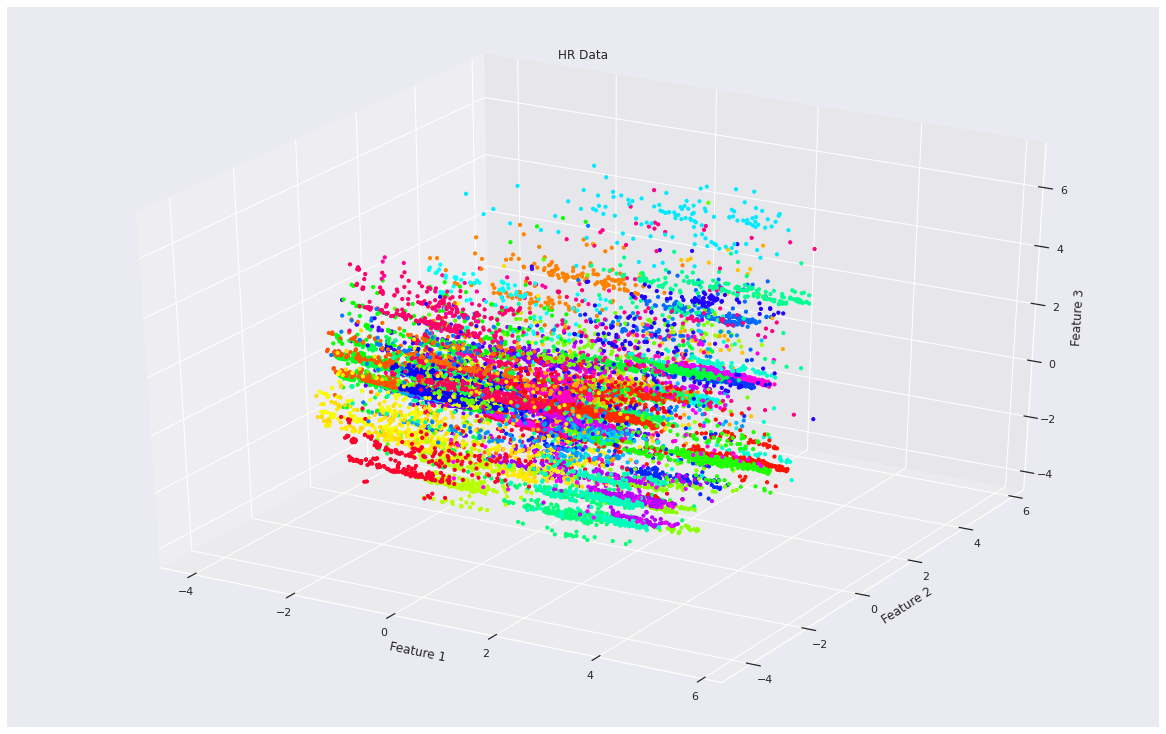

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(figsize=(16, 10))
ax = Axes3D(fig)
for c in range(70):
    tmp_df = pc[pc['Cluster'] == c]
    ax.scatter(tmp_df['Feature 1'], tmp_df['Feature 2'], tmp_df['Feature 3'], color=clr[c], label=c, alpha=1, s=10)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('HR Data')

sns.despine(offset=5, trim=True)
sns.set(font_scale=0.75)

Clustering appears to be in long cylindrical shapes. In that case, DBSCAN can lead to better results.

#### 3. DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.45, metric='euclidean', min_samples=20)
db.fit(reduced)

DBSCAN(algorithm='auto', eps=0.45, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=20, n_jobs=None, p=None)

In [ ]:
pc2 = pd.DataFrame(np.concatenate((reduced, db.labels_.reshape((19093, 1))), axis=1), columns = cols)

In [ ]:
pc2.Cluster.value_counts()

-1.0     18167
 3.0       137
 1.0       102
 2.0        97
 4.0        77
 6.0        70
 7.0        68
 0.0        64
 11.0       60
 8.0        60
 12.0       59
 9.0        32
 10.0       31
 13.0       27
 5.0        22
 14.0       20
Name: Cluster, dtype: int64

In [ ]:
set(db.labels_)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}

In [ ]:
clr = hsv(np.linspace(0, 1.0, 22))

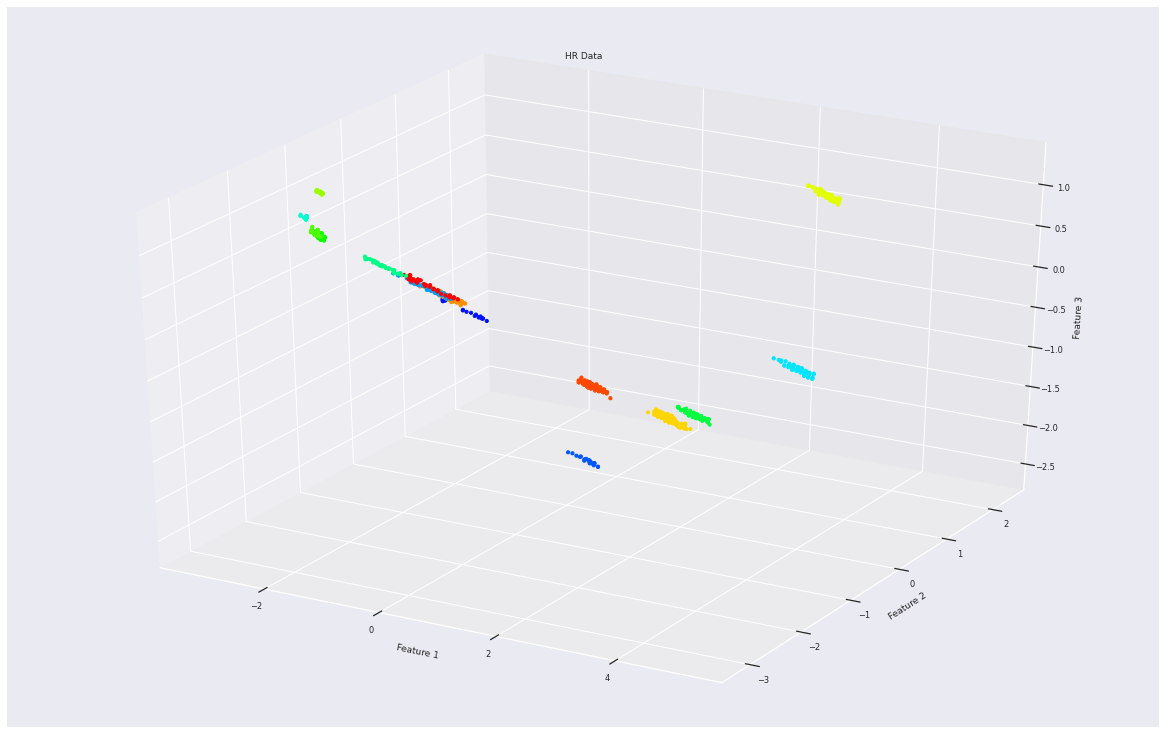

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(figsize=(16, 10))
ax = Axes3D(fig)
for c in range(22):
    tmp_df = pc2[pc2['Cluster'] == c]
    ax.scatter(tmp_df['Feature 1'], tmp_df['Feature 2'], tmp_df['Feature 3'], color=clr[c], label=c, alpha=1, s=10)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('HR Data')

sns.despine(offset=5, trim=True)
sns.set(font_scale=0.75)

With DBSCAN, as expected we see more distinguished clusters,with a large outlier population, but it is not possible to make 20 different models. 

# Models

In [ ]:
############### SVM ####################

In [ ]:
# Setup training / test data
from sklearn.metrics import classification_report
import sklearn.model_selection as cv
from sklearn import svm
from sklearn.model_selection import train_test_split

##Analysis using new data
y = df['target']
X = df.drop(columns = ['target', 'experience_contrast_1', 'experience_contrast_2', 'experience_contrast_4', 'High_and_continuing_education'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1, stratify = y)

In [ ]:
# Standardize the data for the classification

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Linear SVM
import sklearn.model_selection as cv
from sklearn import svm

svc = svm.SVC(kernel='linear', C=1)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred, \
                            target_names = ['Yes', 'No']))

#Does not work, which makes sense since the relationships among the variables are not linear

              precision    recall  f1-score   support

         Yes       0.75      1.00      0.86      3585
          No       0.00      0.00      0.00      1189

    accuracy                           0.75      4774
   macro avg       0.38      0.50      0.43      4774
weighted avg       0.56      0.75      0.64      4774



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Poly Optimization
import sklearn.model_selection as cv
from sklearn import svm 
from sklearn.model_selection import GridSearchCV

svm = svm.SVC(kernel='poly')

# Instantiate the GridSearchCV object and run the search
parameters = {'degree':[2,3],'C':[0.5,1]}
searcher = GridSearchCV(svm, parameters,scoring='f1',n_jobs=-1,verbose=3)
searcher.fit(X_train, y_train)

# Report the best parameters
print("Selected params", searcher.best_params_)
#Poly SVC: When using poly kernel, the results were unstable. Sometimes works, sometimes does not

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   35.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   35.8s finished


Selected params {'C': 1, 'degree': 3}


In [ ]:
#Poly SVC
import sklearn.model_selection as cv
from sklearn import svm

svc = svm.SVC(kernel='poly', degree=3, C=1)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred, \
                            target_names = ['Yes', 'No']))

#When using poly kernel, the results were unstable. Sometimes works, sometimes does not

              precision    recall  f1-score   support

         Yes       0.80      0.93      0.86      3585
          No       0.56      0.28      0.38      1189

    accuracy                           0.77      4774
   macro avg       0.68      0.60      0.62      4774
weighted avg       0.74      0.77      0.74      4774



In [ ]:
# RBF Optimization
import sklearn.model_selection as cv
from sklearn import svm 
svc = svm.SVC(kernel='rbf')

# Instantiate the GridSearchCV object and run the search
parameters = {'gamma':[1,1.5],'C':[0.5,1]}
searcher = GridSearchCV(svc, parameters,scoring='f1',n_jobs=-1)
searcher.fit(X_train, y_train)

# Report the best parameters
print("Selected params", searcher.best_params_)

Selected params {'C': 1, 'gamma': 1}


In [ ]:
#RBF SVC
import sklearn.model_selection as cv
from sklearn import svm

svc = svm.SVC(kernel='rbf', gamma=1, C=1,class_weight= 'balanced' )
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred, \
                            target_names = ['Yes', 'No']))


              precision    recall  f1-score   support

         Yes       0.84      0.81      0.82      3585
          No       0.48      0.53      0.50      1189

    accuracy                           0.74      4774
   macro avg       0.66      0.67      0.66      4774
weighted avg       0.75      0.74      0.74      4774



In [ ]:
### Random Forest ###

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

In [ ]:
forest_model = RandomForestClassifier()
# Set up parameters for grid search
parameters = {'n_estimators' : [250,300],
              'min_samples_split' : [3,5],
              'min_samples_leaf' : [3,4],
              'max_features' : ['auto','sqrt']
             }

In [ ]:
#Using old data
y = df['target']
X = df.loc[:, df.columns != 'target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1, stratify = y)

In [ ]:
# Standardize the data for the classification
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
import time
start_time = time.time()
search = GridSearchCV(forest_model,parameters,verbose=3, scoring = 'f1', n_jobs = -1)
search.fit(X_train,y_train)
print("Finished Grid search in %s seconds." % (time.time() - start_time))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.3min finished


Finished Grid search in 79.83131670951843 seconds.


In [ ]:
forest_predictions = search.predict(X_test)

array([[3194,  391],
       [ 629,  560]])

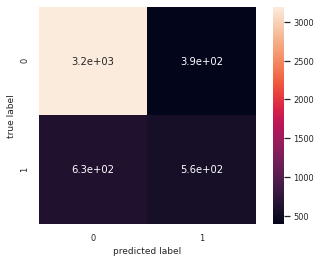

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,forest_predictions)
%matplotlib inline
sns.heatmap(cm,annot=True,square=True,cbar=True)
plt.xlabel('predicted label')
plt.ylabel('true label')
cm

In [ ]:
print(classification_report(y_test, forest_predictions))

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      3585
         1.0       0.59      0.47      0.52      1189

    accuracy                           0.79      4774
   macro avg       0.71      0.68      0.69      4774
weighted avg       0.77      0.79      0.78      4774



In [ ]:
acc_rf_cv = (cross_val_score(search.best_estimator_, X_train, y_train, cv=10, scoring='accuracy', n_jobs=1)).mean()
f1_rf_cv = (cross_val_score(search.best_estimator_, X_train, y_train, cv=10, scoring='f1', n_jobs=1)).mean()

In [ ]:
rf_pred=search.best_estimator_.predict(X_test)
f1_rf = f1_score(y_test, rf_pred)
acc_rf = accuracy_score(y_test, rf_pred)

rf_pred_train=search.best_estimator_.predict(X_train)
f1_rf_train = f1_score(y_train, rf_pred_train)
acc_rf_train = accuracy_score(y_train, rf_pred_train)

In [ ]:
print(f' Training Data Set Accuracy: {acc_rf_train:.3f}')
print(f' Training Data CV Accuracy: {acc_rf_cv:.3f}')
print(f' Test Data Set Accuracy: {acc_rf:.3f}')
print()
print(f' Training Data f1 Score: {f1_rf_train:.4f}')
print(f' Training Data CV f1 Score: {f1_rf_cv:.4f}')
print(f' Test Data Set f1 Score: {f1_rf:.4f}')

 Training Data Set Accuracy: 0.887
 Training Data CV Accuracy: 0.784
 Test Data Set Accuracy: 0.786

 Training Data f1 Score: 0.7455
 Training Data CV f1 Score: 0.5155
 Test Data Set f1 Score: 0.5234


Cross Validation scores are very close to test scores, although training set scores are higher indicating some overfitting. Let's try to reduce the overfitting by deleting some variables that we created initially.

In [ ]:
### Trying to reduce overfitting in the RF model by removing variables and adding a class weight ###

In [ ]:
forest_model = RandomForestClassifier(class_weight={0:1,1:2})

parameters = {'n_estimators' : [250,300],
              'min_samples_split' : [3,5],
              'min_samples_leaf' : [3,4],
              'max_features' : ['auto','sqrt']
             }

In [ ]:
#Analysis using new data
y = df['target']
X = df.drop(columns = ['target', 'experience_contrast_1', 'experience_contrast_2', 'experience_contrast_4', 'High_and_continuing_education'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1, stratify = y)

In [ ]:
X.shape

(19093, 23)

In [ ]:
# Standardize the data for the classification
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
import time
start_time = time.time()
search = GridSearchCV(forest_model,parameters,verbose=1, scoring = 'f1', n_jobs = -1)
search.fit(X_train,y_train)
print("Finished Grid search in %s seconds." % (time.time() - start_time))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.2min finished


Finished Grid search in 73.28135395050049 seconds.


In [ ]:
forest_predictions2 = search.predict(X_test)

array([[2998,  587],
       [ 391,  798]])

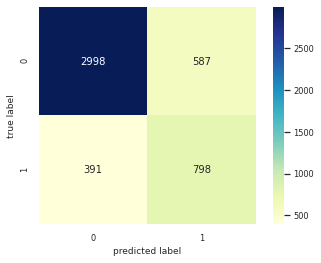

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,forest_predictions2)
%matplotlib inline
sns.heatmap(cm,annot=True,square=True,cbar=True, cmap="YlGnBu" ,fmt='g')
plt.xlabel('predicted label')
plt.ylabel('true label')
cm

In [ ]:
print(classification_report(y_test, forest_predictions2, digits = 3))

              precision    recall  f1-score   support

         0.0      0.885     0.836     0.860      3585
         1.0      0.576     0.671     0.620      1189

    accuracy                          0.795      4774
   macro avg      0.730     0.754     0.740      4774
weighted avg      0.808     0.795     0.800      4774



In [ ]:
acc_rf_cv = (cross_val_score(search.best_estimator_, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1)).mean()
f1_rf_cv = (cross_val_score(search.best_estimator_, X_train, y_train, cv=10, scoring='f1', n_jobs=-1)).mean()

In [ ]:
rf_pred=search.best_estimator_.predict(X_test)
f1_rf = f1_score(y_test, rf_pred)
acc_rf = accuracy_score(y_test, rf_pred)

rf_pred_train=search.best_estimator_.predict(X_train)
f1_rf_train = f1_score(y_train, rf_pred_train)
acc_rf_train = accuracy_score(y_train, rf_pred_train)

In [ ]:
print(f' Training Data Set Accuracy: {acc_rf_train:.3f}')
print(f' Training Data CV Accuracy: {acc_rf_cv:.3f}')
print(f' Test Data Set Accuracy: {acc_rf:.3f}')
print()
print(f' Training Data f1 Score: {f1_rf_train:.3f}')
print(f' Training Data CV f1 Score: {f1_rf_cv:.3f}')
print(f' Test Data Set f1 Score: {f1_rf:.3f}')

 Training Data Set Accuracy: 0.831
 Training Data CV Accuracy: 0.795
 Test Data Set Accuracy: 0.795

 Training Data f1 Score: 0.686
 Training Data CV f1 Score: 0.616
 Test Data Set f1 Score: 0.620


Now the overfitting is less and we have improved the test accuracy by 1%.

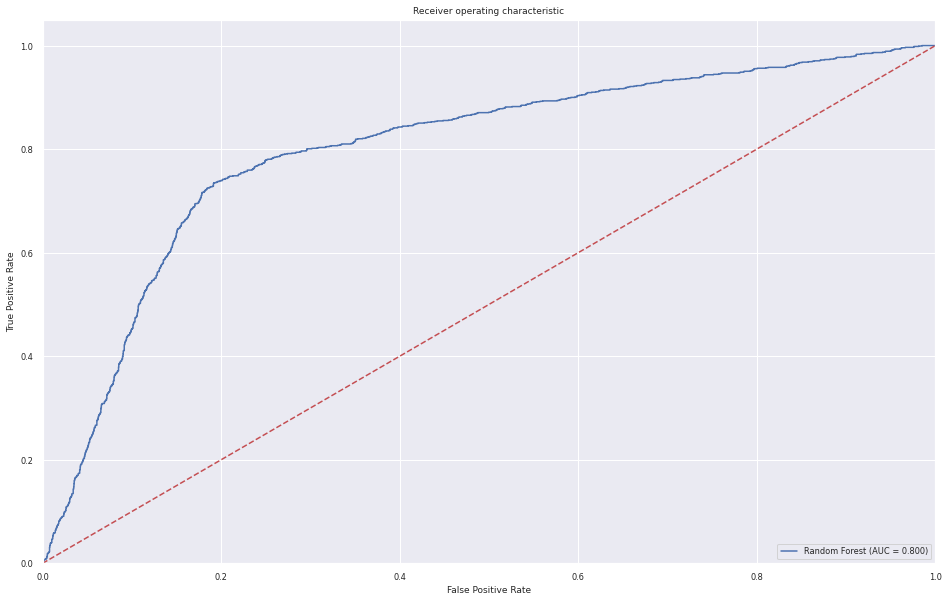

In [ ]:
#ROC Curve
y_pred_prob = search.best_estimator_.predict_proba(X_test)[:,1]
rf_roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(16, 10))
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.3f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

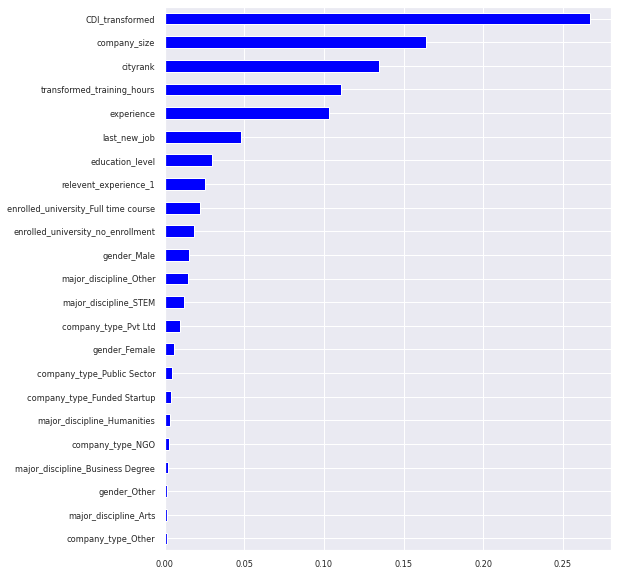

In [ ]:
# Random forest feature importance for selected model

#Features importances
importances_rf = pd.Series(search.best_estimator_.feature_importances_, index = X.columns)

# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='blue', figsize=(8, 10))
plt.show()

In [ ]:
# Dictionary of feature importance for selected model
feat_list = list(search.best_estimator_.feature_importances_)
names_list = list(X.columns)

feat_dictionary = dict(zip(names_list, feat_list))

feat_dictionary

{'CDI_transformed': 0.26713805683780373,
 'cityrank': 0.13459344344582913,
 'company_size': 0.16416151973267878,
 'company_type_Funded Startup': 0.0038899271061844263,
 'company_type_NGO': 0.0026405989020487582,
 'company_type_Other': 0.001089104980364621,
 'company_type_Public Sector': 0.004424786941308232,
 'company_type_Pvt Ltd': 0.009296018041307514,
 'education_level': 0.02977259287212396,
 'enrolled_university_Full time course': 0.0221775019914775,
 'enrolled_university_no_enrollment': 0.018493828820203437,
 'experience': 0.10336032056311897,
 'gender_Female': 0.00585041708249281,
 'gender_Male': 0.014989506983085226,
 'gender_Other': 0.001348235175257146,
 'last_new_job': 0.047845122272267296,
 'major_discipline_Arts': 0.0012360479572740355,
 'major_discipline_Business Degree': 0.0018192798916929571,
 'major_discipline_Humanities': 0.0032263007786480897,
 'major_discipline_Other': 0.014488930593060965,
 'major_discipline_STEM': 0.011978088763924344,
 'relevent_experience_1': 0.0

In [ ]:
### Trying SMOTE to improve the RF model ###

In [ ]:
# Setup training / test data
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection as cv
from collections import Counter

#Analysis using new data
y = df['target']
X_unscaled = df.drop(columns = ['target', 'experience_contrast_1', 'experience_contrast_2', 'experience_contrast_4', 'High_and_continuing_education'])

#Scale data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X_unscaled.values), columns=X_unscaled.columns, index=X_unscaled.index)

#Test, train, split
(x_train, x_test, y_train, y_test) = cv.train_test_split(X, y, test_size=.25, random_state=1, stratify = y)
print("Before oversampling: ",Counter(y_train))

Before oversampling:  Counter({0.0: 10754, 1.0: 3565})


In [ ]:
from imblearn.over_sampling import SMOTE

smote_object = SMOTE()

x_train, y_train = smote_object.fit_resample(x_train, y_train)
print("After oversampling: ",Counter(y_train))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After oversampling:  Counter({0.0: 10754, 1.0: 10754})


In [ ]:
# Standardize the data for the classification
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
x_train = ss.transform(x_train)
x_test = ss.transform(x_test)

In [ ]:
import time
start_time = time.time()
search = GridSearchCV(forest_model,parameters,verbose=1, scoring = 'f1', n_jobs = -1)
search.fit(x_train,y_train)
print("Finished Grid search in %s seconds." % (time.time() - start_time))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.1min finished


Finished Grid search in 131.49998021125793 seconds.


In [ ]:
search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': {0: 1, 1: 2},
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
smote_predictions = search.predict(x_test)

array([[2998,  587],
       [ 391,  798]])

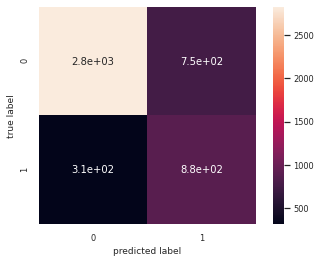

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score
cm2 = confusion_matrix(y_test,smote_predictions)
%matplotlib inline
sns.heatmap(cm2,annot=True,square=True,cbar=True)
plt.xlabel('predicted label')
plt.ylabel('true label')
cm

In [ ]:
print(classification_report(y_test, smote_predictions))

              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84      3585
         1.0       0.54      0.74      0.62      1189

    accuracy                           0.78      4774
   macro avg       0.72      0.77      0.73      4774
weighted avg       0.81      0.78      0.79      4774



In [ ]:
acc_smote_cv = (cross_val_score(search.best_estimator_, x_train, y_train, cv=10, scoring='accuracy', n_jobs=-1)).mean()
f1_smote_cv = (cross_val_score(search.best_estimator_, x_train, y_train, cv=10, scoring='f1', n_jobs=-1)).mean()

In [ ]:
smote_pred=search.best_estimator_.predict(x_test)
f1_smote = f1_score(y_test, smote_pred)
acc_smote = accuracy_score(y_test, smote_pred)

smote_pred_train=search.best_estimator_.predict(x_train)
f1_smote_train = f1_score(y_train, smote_pred_train)
acc_smote_train = accuracy_score(y_train, smote_pred_train)

In [ ]:
print(f' Training Data Set Accuracy: {acc_smote_train:.3f}')
print(f' Training Data CV Accuracy: {acc_smote_cv:.3f}')
print(f' Test Data Set Accuracy: {acc_smote:.3f}')
print()
print(f' Training Data f1 Score: {f1_smote_train:.4f}')
print(f' Training Data CV f1 Score: {f1_smote_cv:.4f}')
print(f' Test Data Set f1 Score: {f1_smote:.4f}')

 Training Data Set Accuracy: 0.892
 Training Data CV Accuracy: 0.843
 Test Data Set Accuracy: 0.778

 Training Data f1 Score: 0.8988
 Training Data CV f1 Score: 0.8490
 Test Data Set f1 Score: 0.6239


Clearly there is overfitting

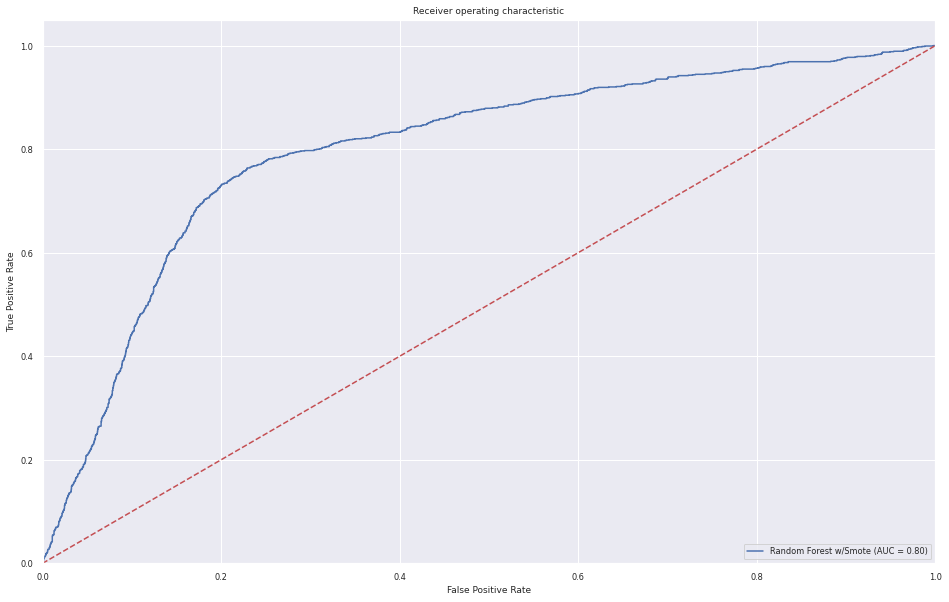

In [ ]:
#ROC Curve
smote_roc_auc = roc_auc_score(y_test, search.best_estimator_.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, search.best_estimator_.predict_proba(x_test)[:,1])
plt.figure(figsize=(16, 10))
plt.plot(fpr, tpr, label='Random Forest w/Smote (AUC = %0.2f)' % smote_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
### Logistic Regression Modification 1###
#set parameter class_weight to balanced#

In [ ]:
#split dataset in features and target variable 
#features such as 'experience_contrast_3', 'relevent_experience_0' etc. have been dropped to reduce highly correlated relationship:  . 

#Analysis using new data
y = df['target']
X = df.drop(columns = ['target', 'experience_contrast_1', 'experience_contrast_2', 'experience_contrast_4', 'High_and_continuing_education'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1, stratify = y)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
# Standardize the data for the classification
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
#set parameter class_weight to balanced to deal with imbalanced data
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.69


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#The result is telling us that we have 3363+207 correct predictions and 980+227 incorrect predictions.

[[2498 1087]
 [ 405  784]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
#Of the entire test set, 71% of the target prediction were accurate (The weighted average of F1 was used).
#The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. 


              precision    recall  f1-score   support

         0.0       0.86      0.70      0.77      3585
         1.0       0.42      0.66      0.51      1189

    accuracy                           0.69      4774
   macro avg       0.64      0.68      0.64      4774
weighted avg       0.75      0.69      0.71      4774



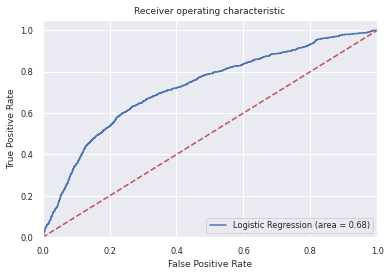

In [ ]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity. 1 is good, perfect classification. 0.5 is worthless.The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner). 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score

y_pred = logreg .predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))
print("Testing Mean Accuracy: ",cross_val_score(logreg,X_train,y_train,cv=5,scoring='accuracy').mean())
print("Testing Mean F1 Score: ",cross_val_score(logreg,X_train,y_train,cv=5,scoring='f1_macro').mean())

Training Data Set Accuracy:  0.6931349954605769
Training Data F1 Score  0.5213507625272331
Testing Mean Accuracy:  0.6922270658000261
Testing Mean F1 Score:  0.6464323083205328


Above metrics that Training Accuracy =Test Accuracy. Hence, model is performing well. 

In [ ]:
###Logistic Regression Modification 2###
#Defined grid search parameters to improve performance#
#Hyperparameter tune#
#Selected logistic regression model

In [ ]:
#Analysis using new data
y = df['target']
X = df.drop(columns = ['target', 'experience_contrast_1', 'experience_contrast_2', 'experience_contrast_4', 'High_and_continuing_education'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1, stratify = y)

In [ ]:
# Standardize the data for the classification
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
#define grid search parameters to optimize preditiction
#max_iter=the bumber of iterations
#solver=the algorithm to use for optimization
#class_weight = to troubleshoot unbalanced data sampling

param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']}   

In [ ]:
#Hyperparameter tune using Training data
from sklearn.model_selection import GridSearchCV
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=1), 
                             param_grid=param_grid_lr, verbose=1, cv=10, n_jobs=-1,scoring='f1')
logModel_grid.fit(X_train, y_train)
print(logModel_grid.best_estimator_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    9.0s finished


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=20, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
y_pred = logModel_grid.predict(X_test)
print(y_pred)

[0. 1. 1. ... 0. 0. 1.]


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix \n")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

[[2498 1087]
 [ 405  784]] : is the confusion matrix 

0.6874738165060745 : is the accuracy score
0.41902725815072156 : is the precision score
0.6593776282590412 : is the recall score
0.5124183006535948 : is the f1 score


In [ ]:
#Output 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.70      0.77      3585
         1.0       0.42      0.66      0.51      1189

    accuracy                           0.69      4774
   macro avg       0.64      0.68      0.64      4774
weighted avg       0.75      0.69      0.71      4774



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score

y_pred = logreg.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))
print("Testing Mean Accuracy: ",cross_val_score(logreg,X_train,y_train,cv=5,scoring='accuracy').mean())
print("Testing Mean F1 Score: ",cross_val_score(logreg,X_train,y_train,cv=5,scoring='f1_macro').mean())

Training Data Set Accuracy:  0.6931349954605769
Training Data F1 Score  0.5213507625272331
Testing Mean Accuracy:  0.6922270658000261
Testing Mean F1 Score:  0.6464323083205328


In [ ]:
# Dictionary of coefficient values for selected model
coefs_list = list(logreg.coef_[0])
names_list = list(X.columns)

coefs_dictionary = dict(zip(names_list, coefs_list))

coefs_dictionary

{'CDI_transformed': -0.6318302754343461,
 'cityrank': -0.011918920209093764,
 'company_size': 0.041369402861913464,
 'company_type_Funded Startup': -0.05637759423713133,
 'company_type_NGO': 0.0025075871248740884,
 'company_type_Other': 0.040908969918179806,
 'company_type_Public Sector': 0.04439259372044123,
 'company_type_Pvt Ltd': 0.1308065683130304,
 'education_level': -0.07009665176247576,
 'enrolled_university_Full time course': 0.1573473986406481,
 'enrolled_university_no_enrollment': -0.022208815044315895,
 'experience': -0.133195371652939,
 'gender_Female': 0.05238680018480414,
 'gender_Male': -0.032245562477673864,
 'gender_Other': 0.03688179011280997,
 'last_new_job': 0.05991871230686155,
 'major_discipline_Arts': 0.014534200255258593,
 'major_discipline_Business Degree': 0.0243264181949944,
 'major_discipline_Humanities': 0.0007418132452548365,
 'major_discipline_Other': -0.3198173723379275,
 'major_discipline_STEM': -0.050353528500824564,
 'relevent_experience_1': -0.23830

In [ ]:
###Logistic Regression Modification 3###
#Set parameter class_weight to balanced#
#Explore a resampling technique using SMOTE#
#SMOTE not used to standardize dataset vs. selected random forest data set#

In [ ]:
#Analysis using new data
y = df['target']
X = df.drop(columns = ['target', 'experience_contrast_1', 'experience_contrast_2', 'experience_contrast_4', 'High_and_continuing_education'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1, stratify = y)

In [ ]:
# !pip install imbalanced-learn==0.6.0
# !pip install scikit-learn==0.22.1

In [ ]:
#SMOTE Removed to standardize data set 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

sm = SMOTE(random_state = 1)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Standardize the data for the classification
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
#set parameter class_weight to balanced
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced')
model_res = logreg.fit(X_train, y_train)

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.69


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2514 1071]
 [ 421  768]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.70      0.77      3585
         1.0       0.42      0.65      0.51      1189

    accuracy                           0.69      4774
   macro avg       0.64      0.67      0.64      4774
weighted avg       0.75      0.69      0.71      4774



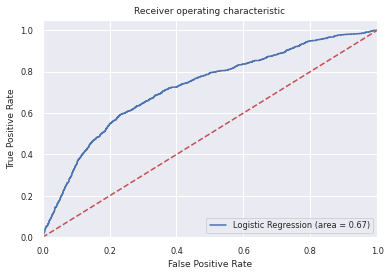

In [ ]:
#ROC Curve: a plot of the true positive rate against the false positive rate. 
#Plot shows the tradeoff between sensitivity and specificity. 1 is good, perfect classification. 0.5 is worthless.
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
#training dataset accuracy is slightly higher than the testing accuracy (overfitting) as a result of oversampling the minority class by synthetically generating additional samples
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score

y_pred = logreg .predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))
print("Testing Mean Accuracy: ",cross_val_score(logreg,X_train,y_train,cv=5,scoring='accuracy').mean())
print("Testing Mean F1 Score: ",cross_val_score(logreg,X_train,y_train,cv=5,scoring='f1_macro').mean())

Training Data Set Accuracy:  0.6860702994234703
Training Data F1 Score  0.680635701447356
Testing Mean Accuracy:  0.6850013257379842
Testing Mean F1 Score:  0.6848891045167234


In [ ]:
#Stoschastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

In [ ]:
#Analysis using new data
y = df['target']
X = df.drop(columns = ['target', 'experience_contrast_1', 'experience_contrast_2', 'experience_contrast_4', 'High_and_continuing_education'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1, stratify = y)

In [ ]:
# Standardize the data for the classification
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
acc_sgd = sgd.score(X_test, y_test) 
sgd_pred=sgd.predict(X_test)
f1_sgd = f1_score(y_test, sgd_pred)
sgd_pred_train=sgd.predict(X_train)
f1_sgd_train = f1_score(y_train, sgd_pred_train)
acc_sgd_train = accuracy_score(y_train, sgd_pred_train)

In [ ]:
acc_sgd_cv = (cross_val_score(sgd, X_train, y_train, cv=10, scoring='accuracy', n_jobs=1)).mean()
f1_sgd_cv = (cross_val_score(sgd, X_train, y_train, cv=10, scoring='f1', n_jobs=1)).mean()

In [ ]:
print(f' Training Data Set Accuracy: {acc_sgd_train:.3f}')
print(f' Training Data CV Accuracy: {acc_sgd_cv:.3f}')
print(f' Test Data Set Accuracy: {acc_sgd:.3f}')
print()
print(f' Training Data f1 Score: {f1_sgd_train:.4f}')
print(f' Training Data CV f1 Score: {f1_sgd_cv:.4f}')
print(f' Test Data Set f1 Score: {f1_sgd:.4f}')

 Training Data Set Accuracy: 0.754
 Training Data CV Accuracy: 0.749
 Test Data Set Accuracy: 0.755

 Training Data f1 Score: 0.0927
 Training Data CV f1 Score: 0.0836
 Test Data Set f1 Score: 0.0830


In [ ]:
confusion_matrix(y_test,sgd_pred)


array([[3550,   35],
       [1136,   53]])

In [ ]:
print(classification_report(y_test, sgd_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.99      0.86      3585
         1.0       0.60      0.04      0.08      1189

    accuracy                           0.75      4774
   macro avg       0.68      0.52      0.47      4774
weighted avg       0.72      0.75      0.67      4774



In [ ]:
parameters = {'loss' : ['hinge', 'modified_huber'],
              'penalty' : ['l2', 'l1'],
              'alpha' : [0.0003,0.0005,0.0007],
              'max_iter' : [1000,1500],
              'class_weight': [None,'balanced']
             }

In [ ]:
import time
start_time = time.time()
search2 = GridSearchCV(sgd,parameters,verbose=3, scoring = 'f1', n_jobs = -1)
search2.fit(X_train,y_train)
print("Finished Grid search in %s seconds." % (time.time() - start_time))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    8.7s finished


Finished Grid search in 8.930584907531738 seconds.


In [ ]:
search2.best_estimator_.get_params()

{'alpha': 0.0005,
 'average': False,
 'class_weight': 'balanced',
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l1',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

array([[2447, 1138],
       [ 428,  761]])

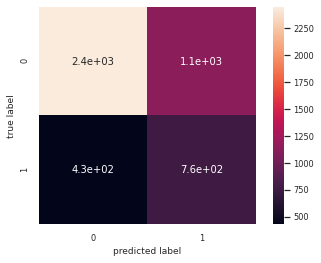

In [ ]:
cm = confusion_matrix(y_test,search2.predict(X_test))
%matplotlib inline
sns.heatmap(cm,annot=True,square=True,cbar=True)
plt.xlabel('predicted label')
plt.ylabel('true label')
cm

In [ ]:
sgd_pred2 = search2.predict(X_test)
print(classification_report(y_test, sgd_pred2))

              precision    recall  f1-score   support

         0.0       0.85      0.68      0.76      3585
         1.0       0.40      0.64      0.49      1189

    accuracy                           0.67      4774
   macro avg       0.63      0.66      0.63      4774
weighted avg       0.74      0.67      0.69      4774



In [ ]:
sgd_pred2 =search2.predict(X_test)
f1_sgd2 = f1_score(y_test, sgd_pred2)
acc_sgd2 = accuracy_score(y_test, sgd_pred2)

sgd_pred_train2 = search2.predict(X_train)
f1_sgd_train2 = f1_score(y_train, sgd_pred_train2)
acc_sgd_train2 = accuracy_score(y_train, sgd_pred_train2)

In [ ]:
acc_sgd_cv2 = (cross_val_score(search2.best_estimator_, X_train, y_train, cv=10, scoring='accuracy', n_jobs=1)).mean()
f1_sgd_cv2 = (cross_val_score(search2.best_estimator_, X_train, y_train, cv=10, scoring='f1', n_jobs=1)).mean()

In [ ]:
print(f' Training Data Set Accuracy: {acc_sgd_train2:.3f}')
print(f' Training Data CV Accuracy: {acc_sgd_cv2:.3f}')
print(f' Test Data Set Accuracy: {acc_sgd2:.3f}')
print()
print(f' Training Data f1 Score: {f1_sgd_train2:.4f}')
print(f' Training Data CV f1 Score: {f1_sgd_cv2:.4f}')
print(f' Test Data Set f1 Score: {f1_sgd2:.4f}')

 Training Data Set Accuracy: 0.680
 Training Data CV Accuracy: 0.691
 Test Data Set Accuracy: 0.672

 Training Data f1 Score: 0.5062
 Training Data CV f1 Score: 0.5038
 Test Data Set f1 Score: 0.4929


In [ ]:
####### knn Classifier #############

In [ ]:
#Analysis using new data
y = df['target']
X = df.drop(columns = ['target', 'experience_contrast_1', 'experience_contrast_2', 'experience_contrast_4', 'High_and_continuing_education'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1, stratify = y)

In [ ]:
# Standardize the data for the classification
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,15)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

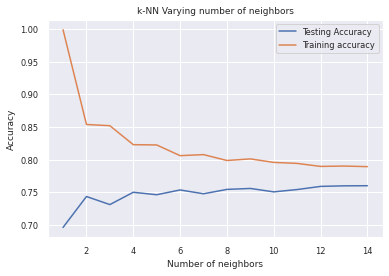

In [ ]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Run model with selected number of classifiers
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

#Overall Score
print("Overall score:",knn.score(X_test,y_test))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test,y_pred))

Overall score: 0.750733137829912
[[3292  293]
 [ 897  292]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85      3585
         1.0       0.50      0.25      0.33      1189

    accuracy                           0.75      4774
   macro avg       0.64      0.58      0.59      4774
weighted avg       0.71      0.75      0.72      4774



## Additional Visualizations

Company size and CDI are the most important splitters, followed by cityrank, experience, and training hours. 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


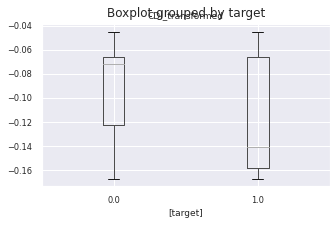

In [ ]:
#CDI Transformed

#Box plot
CDI_df= df[['target', 'CDI_transformed']]

CDI_df.boxplot(by='target',figsize=(5,3))


In [ ]:
#Company size

#Box plot
company_size_df= df[['target', 'company_size']]

#0
company_size_df_0 = company_size_df.loc[df['target'] == 0]
company_size_df_0.drop(columns='target',inplace=True)

#1
company_size_df_1 = company_size_df.loc[df['target'] == 1]
company_size_df_1.drop(columns='target',inplace=True)

print(company_size_df_0.company_size.value_counts())

2912.804254     3411
75.000000       2534
300.000000      2150
12000.000000    1628
35.000000       1127
3000.000000     1124
5.000000        1082
750.000000       722
7500.000000      459
3621.881068       75
1962.302231       16
2704.336283        6
142.203219         4
42.399666          1
Name: company_size, dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
print(company_size_df_1.company_size.value_counts())

2912.804254     2333
75.000000        544
300.000000       413
12000.000000     383
35.000000        339
5.000000         222
3000.000000      199
750.000000       152
7500.000000      100
3621.881068       54
1962.302231       10
42.399666          2
2704.336283        2
142.203219         1
Name: company_size, dtype: int64


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


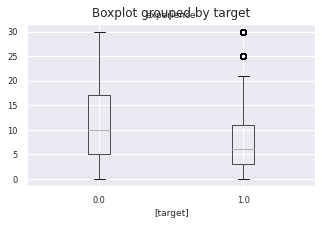

In [ ]:
#Experience

#Box plot
experience_df= df[['target', 'experience']]


experience_df.boxplot(by='target',figsize=(5,3))

In [ ]:
experience_df.groupby(by = 'experience').target.sum()/experience_df.groupby(by = 'experience').target.count()

experience
0.0     0.454023
1.0     0.424408
2.0     0.331854
3.0     0.353028
4.0     0.325731
5.0     0.288112
6.0     0.282072
7.0     0.294747
8.0     0.243142
9.0     0.217347
10.0    0.210152
11.0    0.227410
12.0    0.186235
13.0    0.192982
14.0    0.182594
15.0    0.166181
16.0    0.141732
17.0    0.166667
18.0    0.153571
19.0    0.174342
21.0    0.166440
25.0    0.157143
30.0    0.145914
Name: target, dtype: float64

Text(0, 0.5, '% of job change seekers')

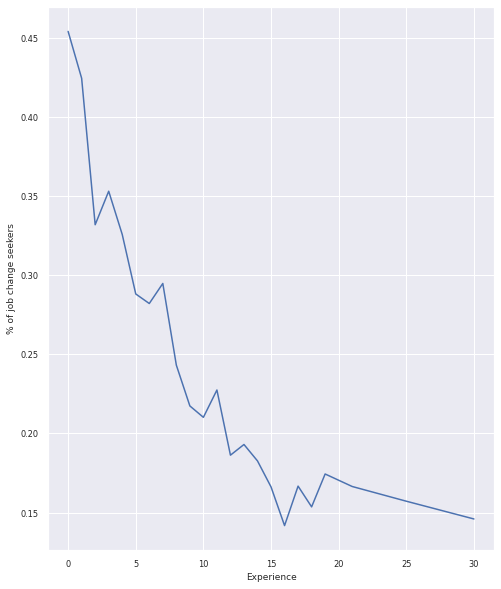

In [ ]:
#Experience (cont'd)
plt.figure(figsize=(8,10))
plt.plot(df.experience.sort_values().unique(),df.groupby(by = 'experience').target.sum()/experience_df.groupby(by = 'experience').target.count())
plt.xlabel('Experience')
plt.ylabel('% of job change seekers')

percentage_of_total    100.0
dtype: float64
percentage_of_total    100.0
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/py

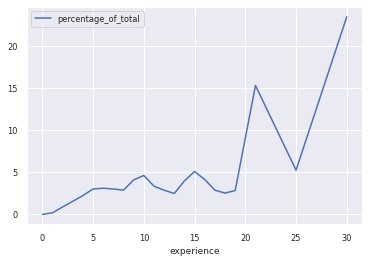

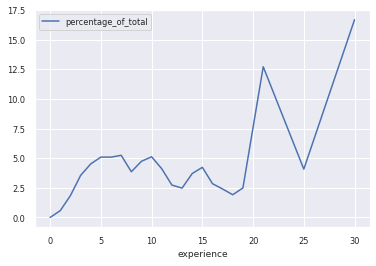

In [ ]:
#Experience (cont'd)

#0
experience_df_0 = experience_df.loc[df['target'] == 0]
experience_df_0.drop(columns='target',inplace=True)
experience_df_0['percentage_of_total'] = (experience_df_0/ experience_df_0.sum()) * 100
experience_df_0 = experience_df_0.groupby('experience').sum()
experience_df_0 = experience_df_0.sort_values(by=['experience'], ascending=False)
print(experience_df_0.sum())
experience_df_0.plot()

#1
experience_df_1 = experience_df.loc[df['target'] == 1]
experience_df_1.drop(columns='target',inplace=True)
experience_df_1['percentage_of_total'] = (experience_df_1/ experience_df_1.sum()) * 100
experience_df_1 = experience_df_1.groupby('experience').sum()
experience_df_1 = experience_df_1.sort_values(by=['experience'], ascending=False)

print(experience_df_1.sum())
experience_df_1.plot()

Text(0, 0.5, '% of job change seekers')

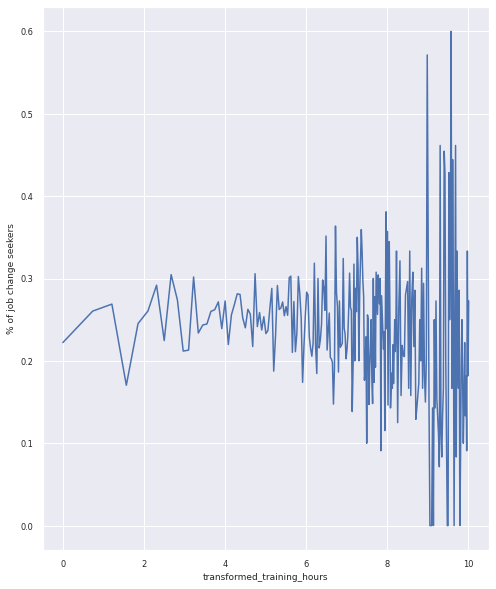

In [ ]:
plt.figure(figsize=(8,10))
plt.plot(df.transformed_training_hours.sort_values().unique(),df.groupby(by = 'transformed_training_hours').target.sum()/df.groupby(by = 'transformed_training_hours').target.count())
plt.xlabel('transformed_training_hours')
plt.ylabel('% of job change seekers')


Text(0, 0.5, '% of job change seekers')

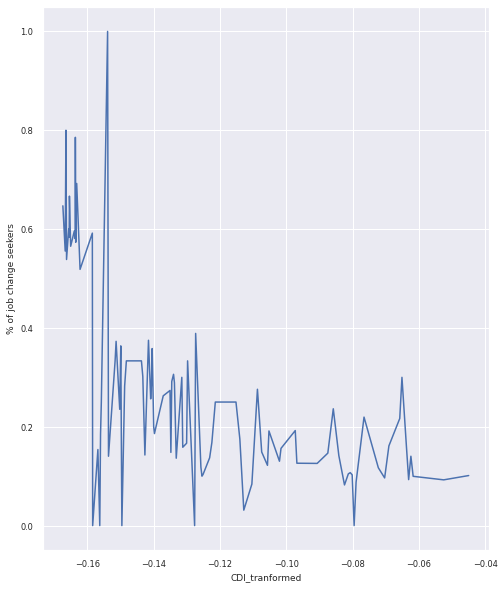

In [ ]:
plt.figure(figsize=(8,10))
plt.plot(df.CDI_transformed.sort_values().unique(),df.groupby(by = 'CDI_transformed').target.sum()/df.groupby(by = 'CDI_transformed').target.count())
plt.xlabel('CDI_tranformed')
plt.ylabel('% of job change seekers')